In [276]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D


In [277]:
df = pd.read_csv("stats.csv")
class_names = df["race"].unique()
print(class_names)

['dragonborn' 'dwarf' 'elf' 'gnome' 'half.elf' 'half.orc' 'halfling'
 'human' 'tiefling']


In [278]:
df
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
 
display(df)

,race,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma
0,dragonborn,79,279,30,14,15,12,7,13,16
1,dragonborn,79,331,30,11,11,11,13,13,17
2,dragonborn,71,230,30,14,16,11,13,10,18
3,dragonborn,75,265,30,8,19,7,10,13,16
4,dragonborn,72,229,30,8,17,14,14,10,9
...,...,...,...,...,...,...,...,...,...,...
9995,tiefling,63,146,30,13,18,17,13,15,13
9996,tiefling,72,230,30,8,14,13,6,14,20
9997,tiefling,66,137,30,4,5,16,12,12,15
9998,tiefling,68,143,30,12,16,12,15,9,16


In [279]:
nacount = (df[df.columns].isna().sum())
columcount = df[df.columns].count()


print((df[df.columns].isna().sum() / df.shape[0])*100)

race            0.0
height          0.0
weight          0.0
speed           0.0
strength        0.0
dexterity       0.0
constitution    0.0
intelligence    0.0
wisdom          0.0
charisma        0.0
dtype: float64


In [280]:
desc = df.describe()
desc

,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,59.597500,146.863500,28.324500,12.85130,12.838400,12.752800,12.752900,12.41650,12.870100
std,13.283107,68.304729,2.360245,2.96494,2.945531,2.924953,2.947119,2.89283,2.974746
min,33.000000,39.000000,25.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000
25%,52.000000,120.000000,25.000000,11.00000,11.000000,11.000000,11.000000,10.00000,11.000000
50%,64.000000,154.000000,30.000000,13.00000,13.000000,13.000000,13.000000,13.00000,13.000000
75%,69.000000,188.000000,30.000000,15.00000,15.000000,15.000000,15.000000,15.00000,15.000000
max,82.000000,367.000000,30.000000,20.00000,20.000000,20.000000,20.000000,19.00000,20.000000


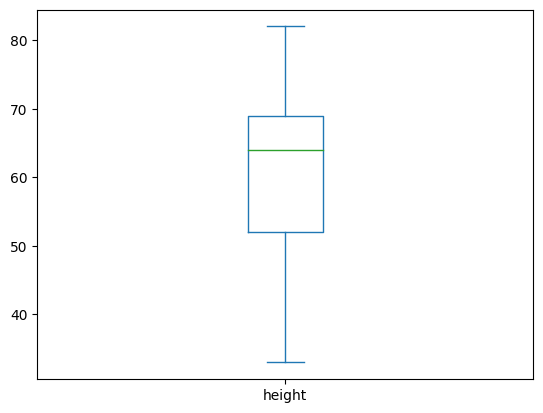

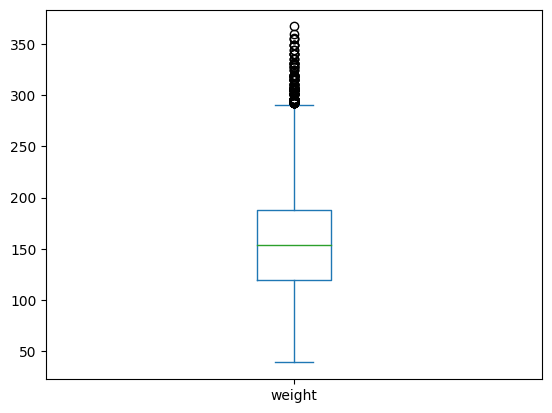

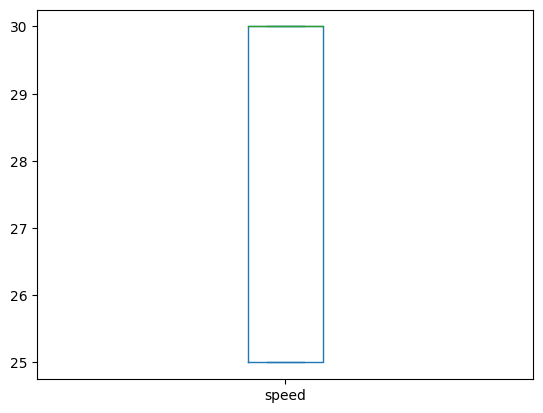

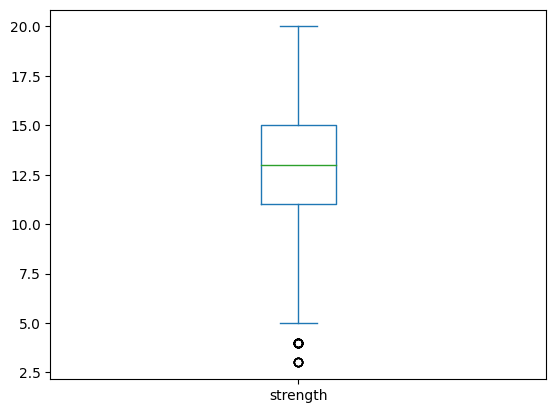

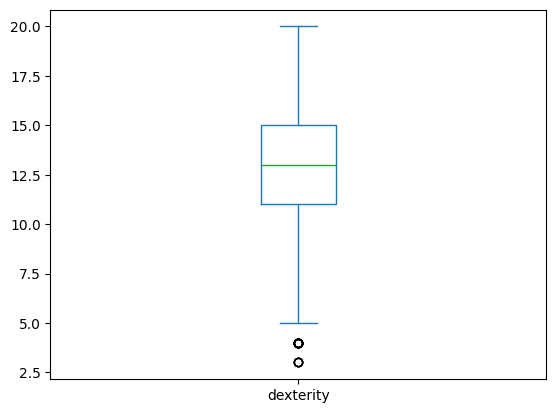

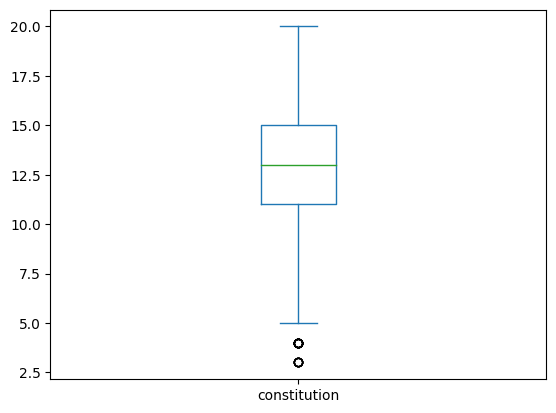

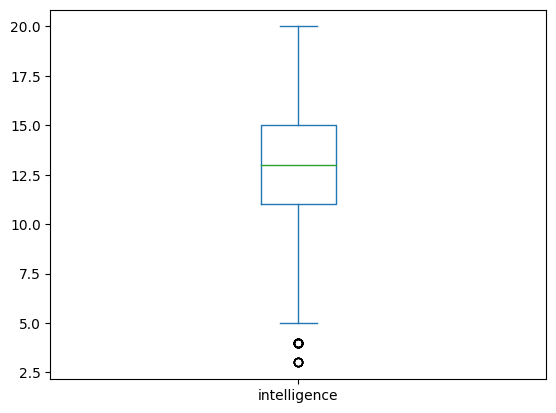

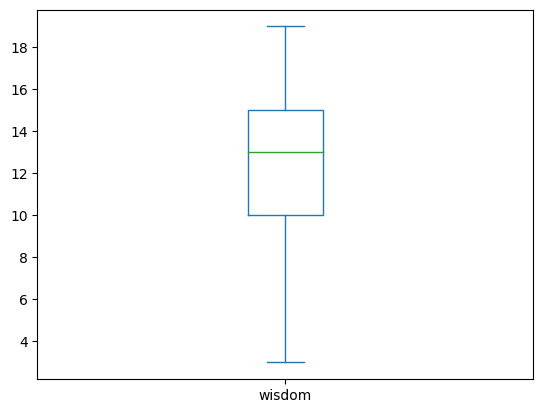

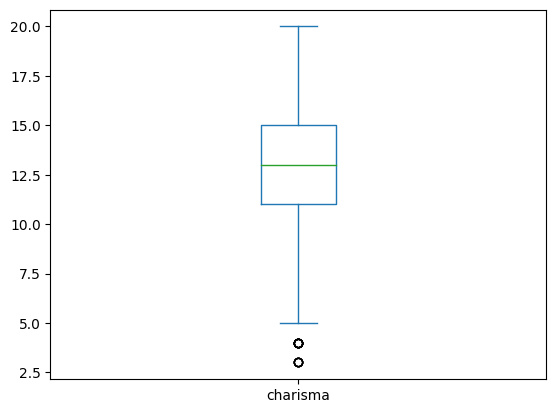

In [281]:
for i in range(df.shape[1]-1):
    df[df.columns[i+1]].plot(kind='box')
    plt.show()

In [282]:
raceuni=df["race"].unique()
raceuni

array(['dragonborn', 'dwarf', 'elf', 'gnome', 'half.elf', 'half.orc',
       'halfling', 'human', 'tiefling'], dtype=object)

dragonborn-------------------------------------


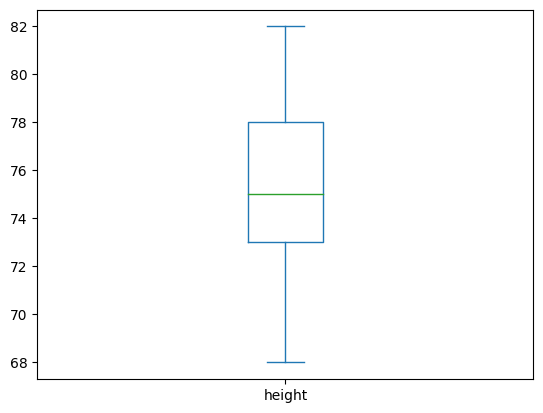

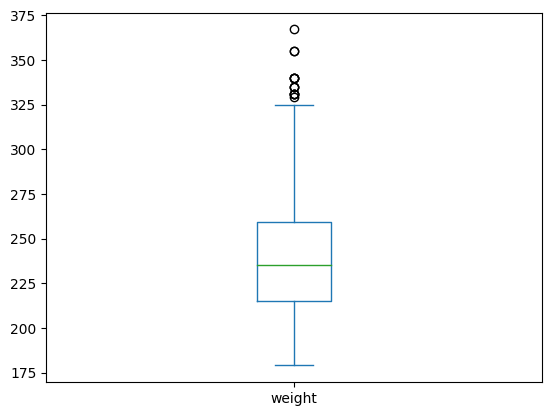

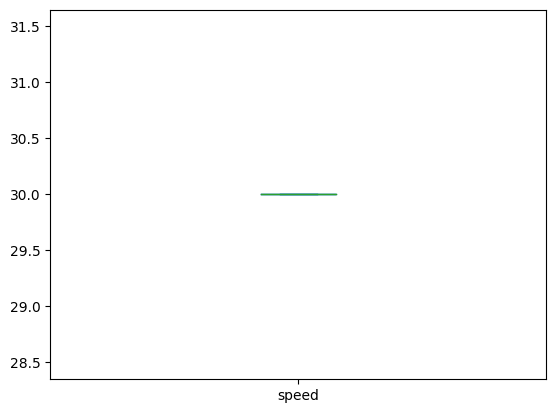

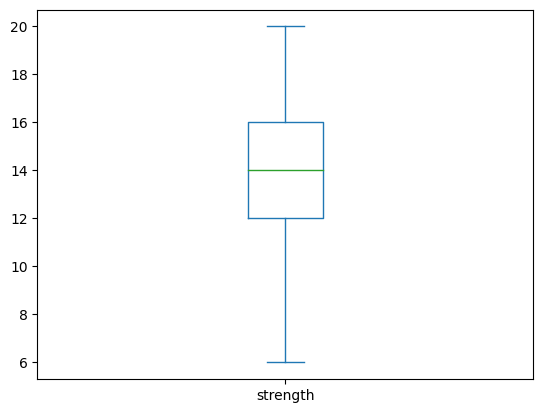

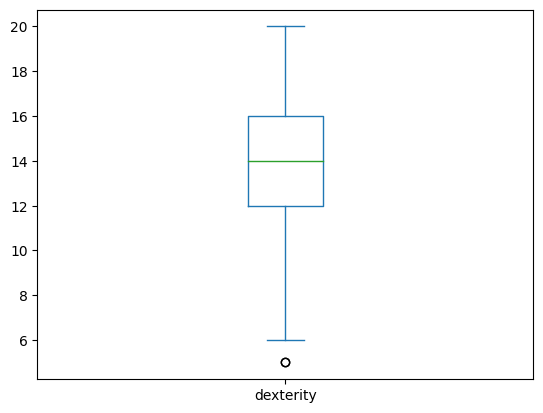

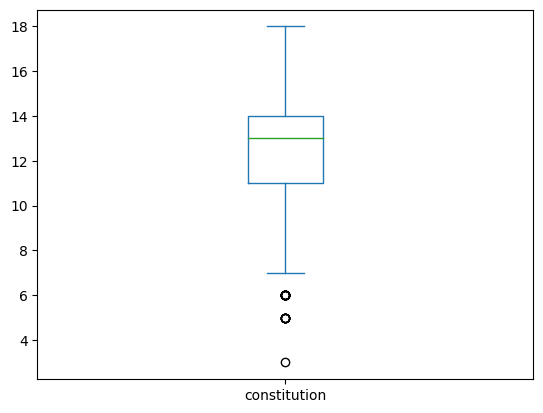

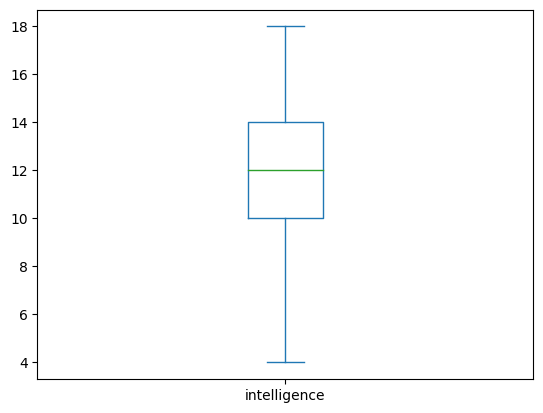

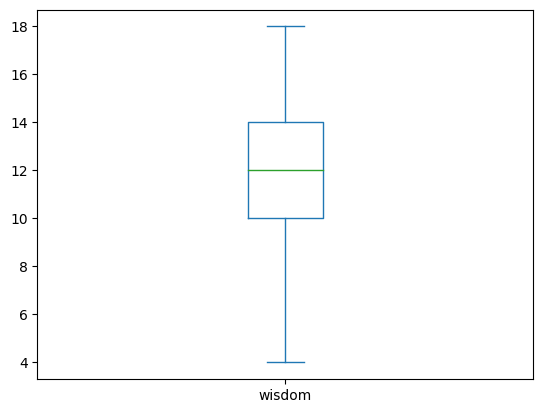

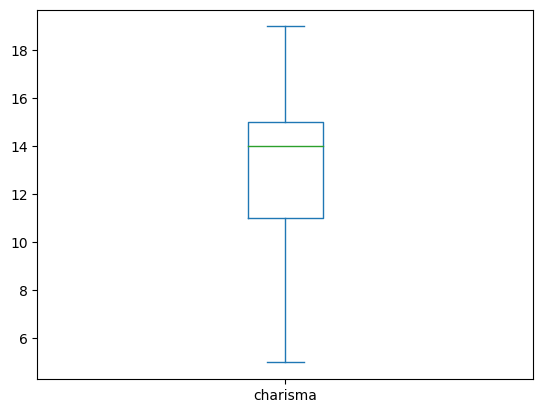

dwarf-------------------------------------


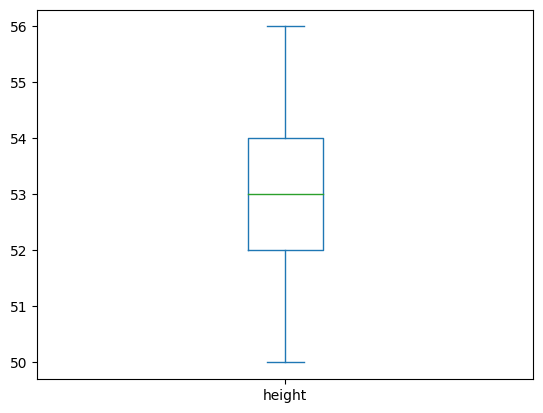

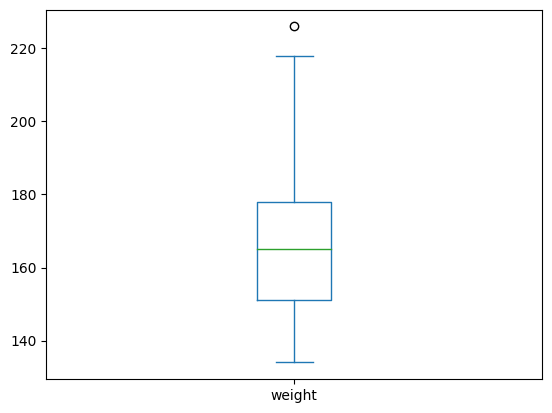

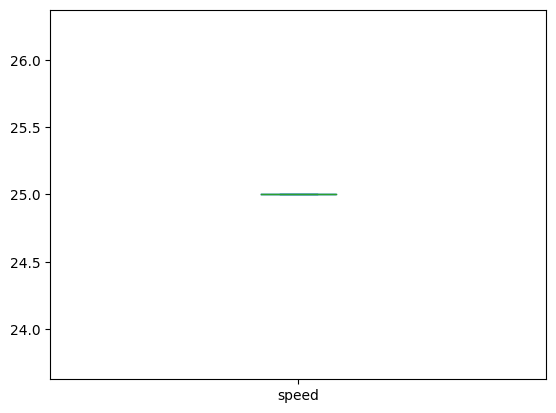

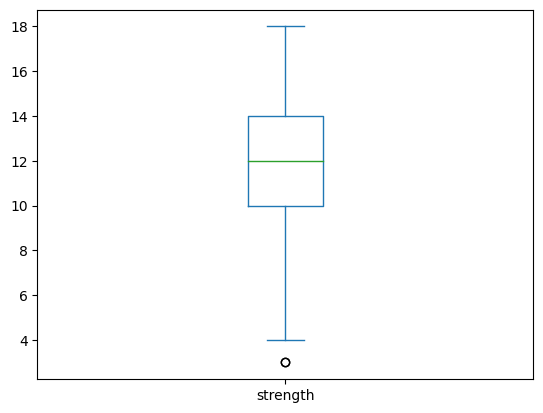

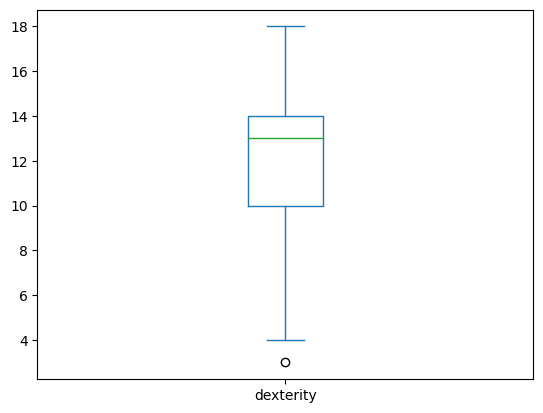

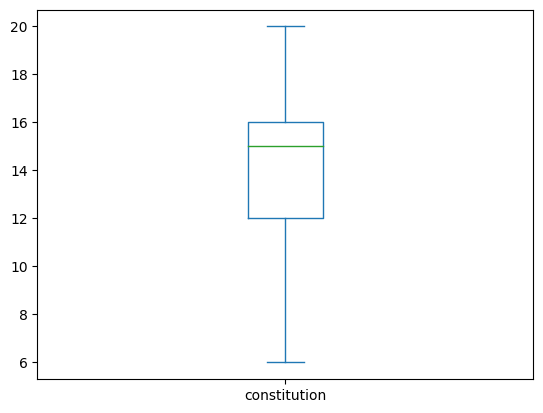

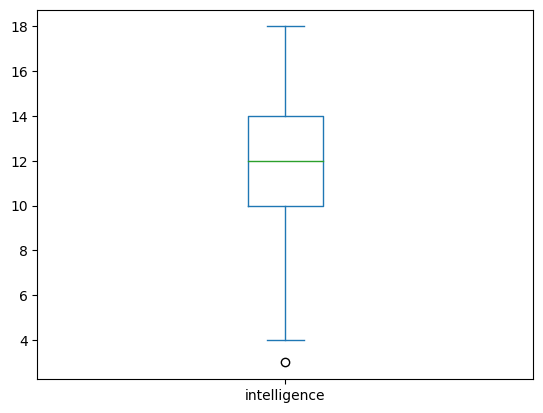

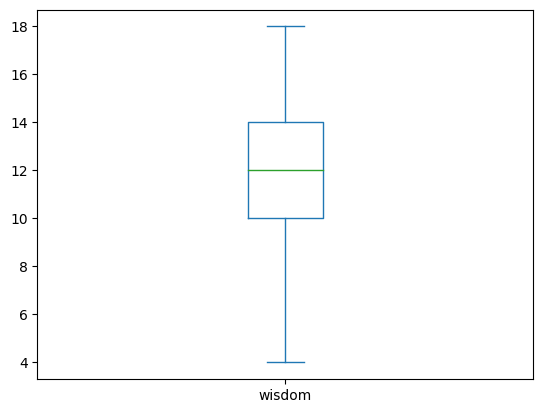

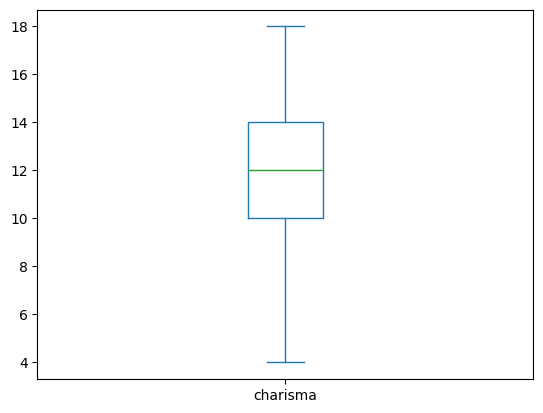

elf-------------------------------------


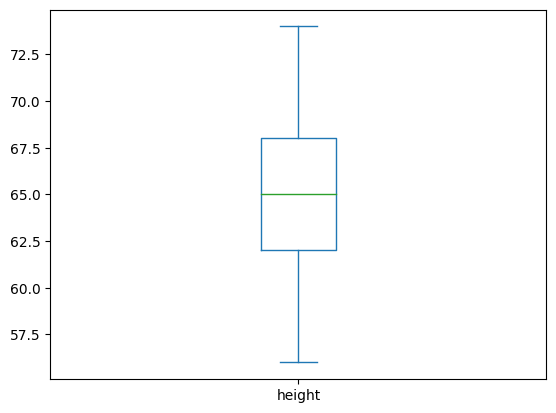

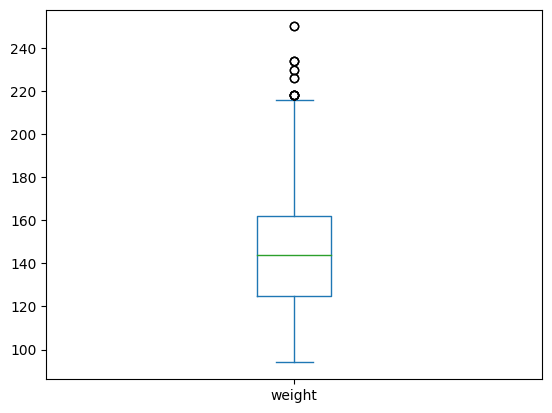

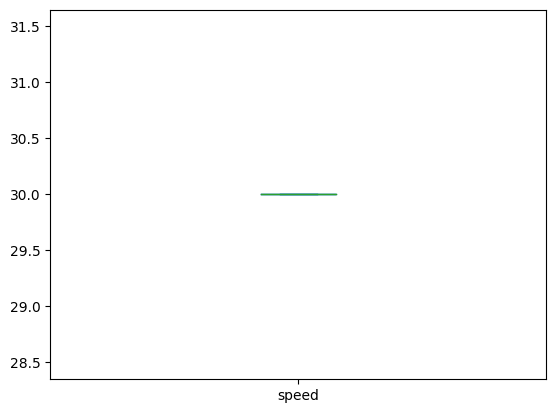

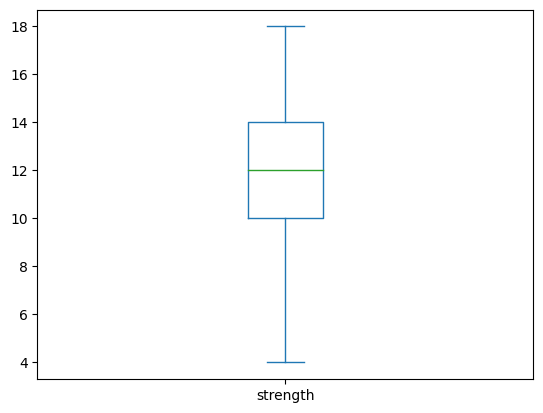

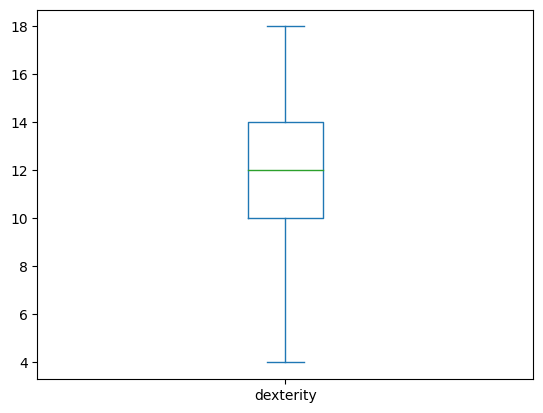

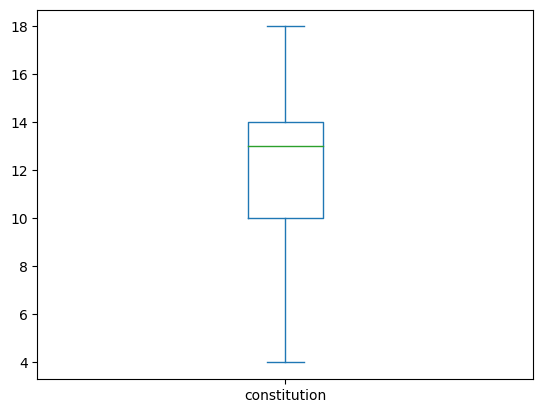

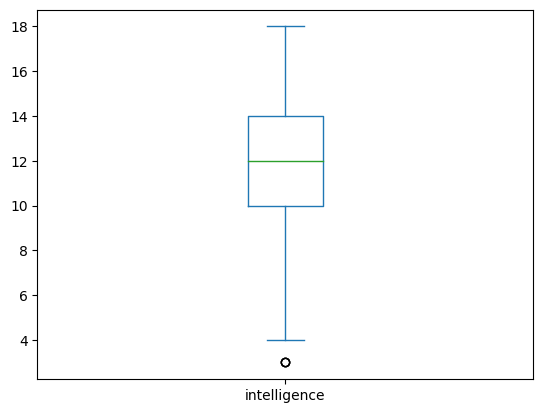

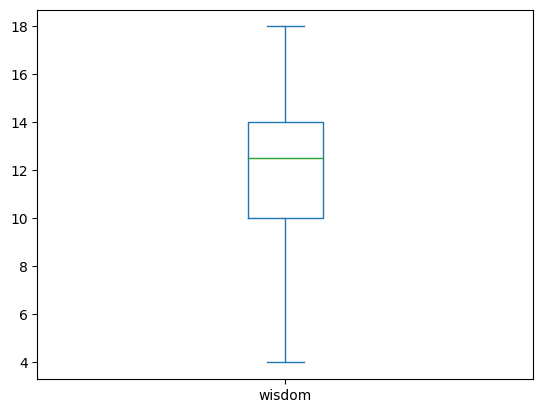

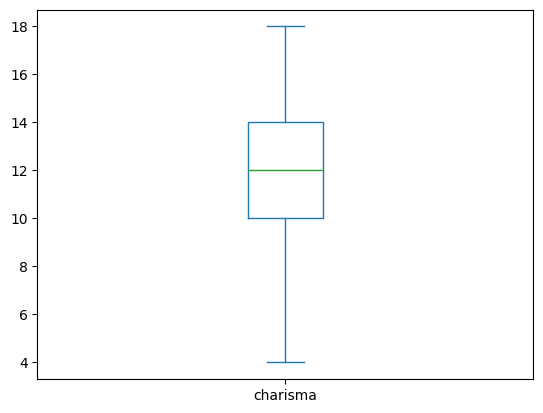

gnome-------------------------------------


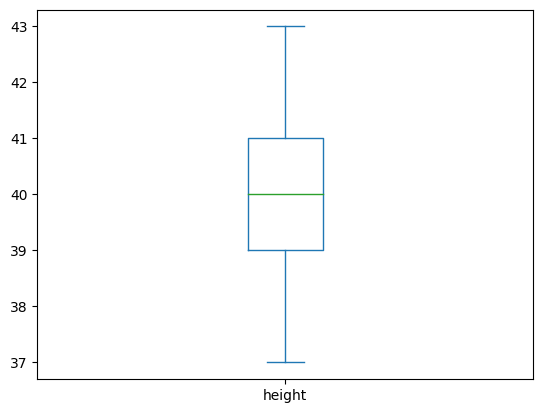

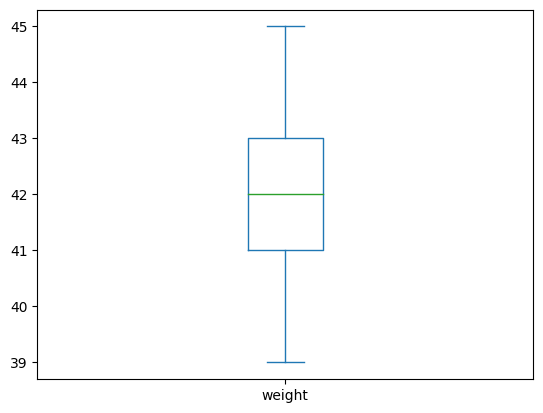

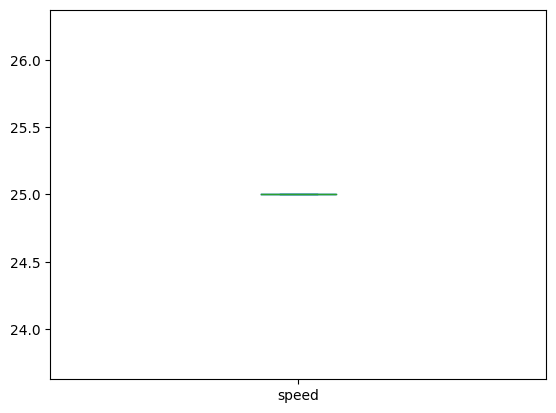

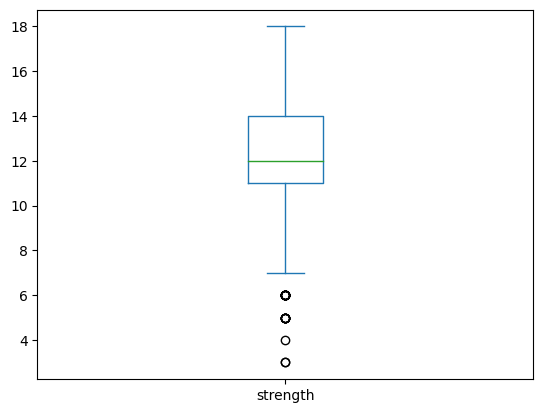

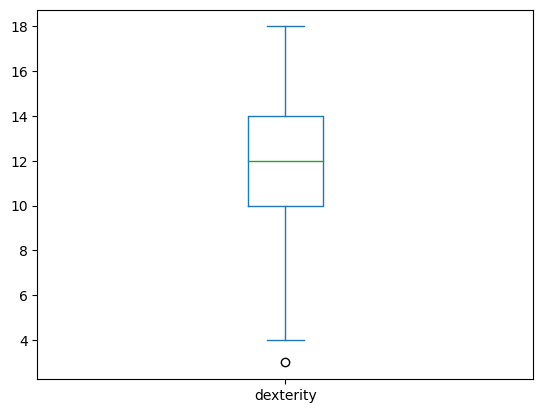

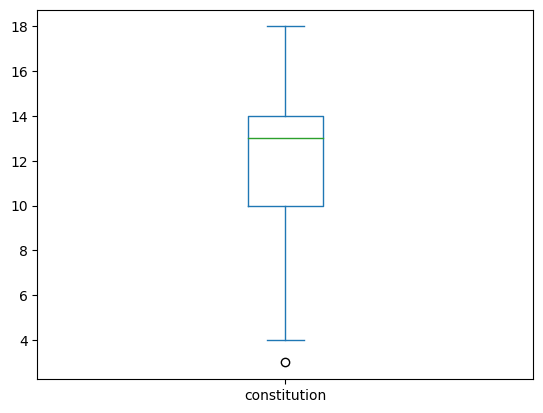

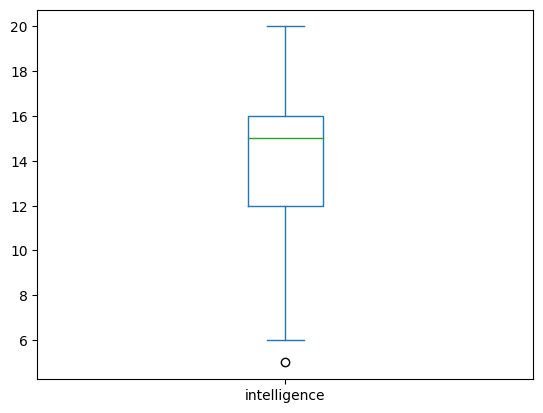

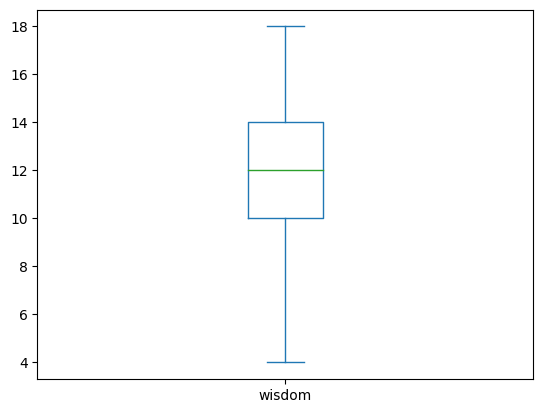

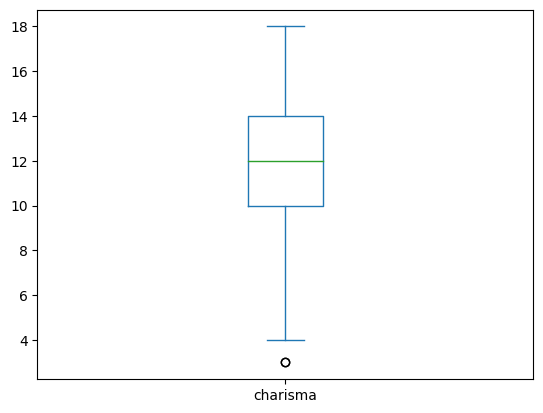

half.elf-------------------------------------


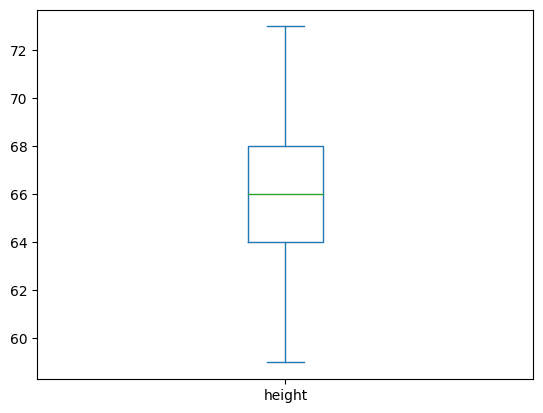

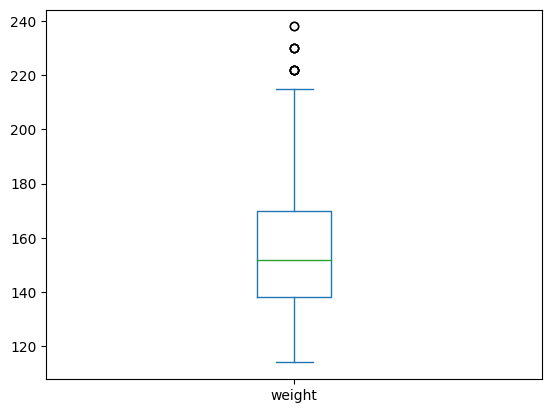

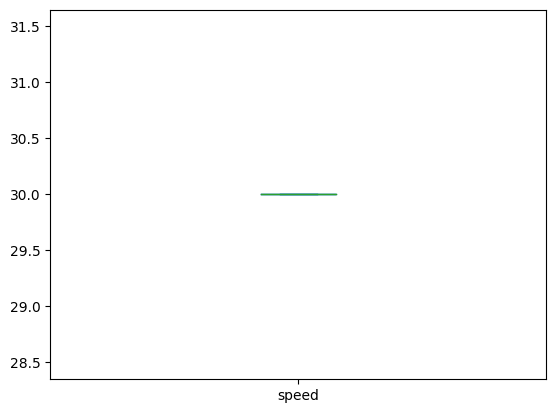

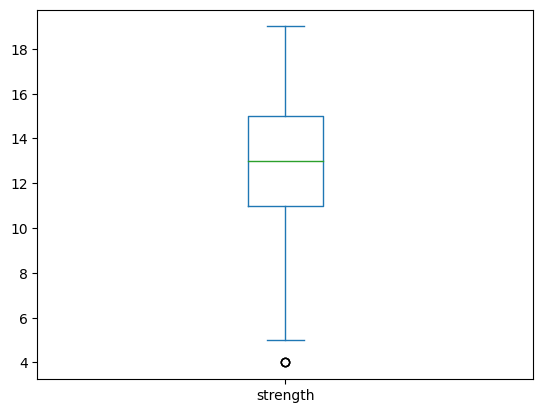

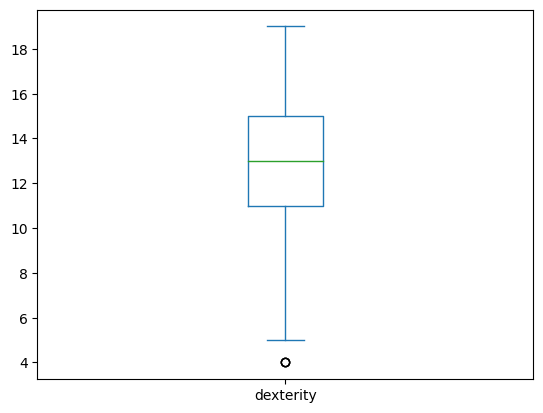

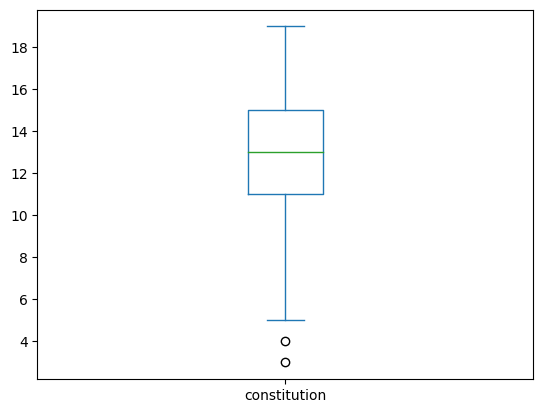

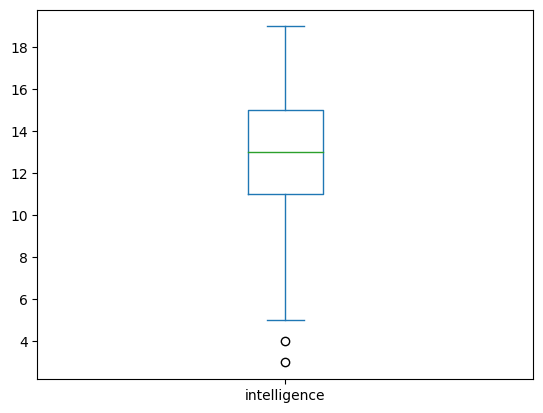

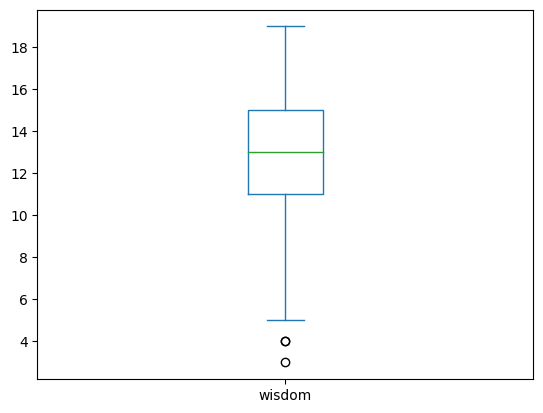

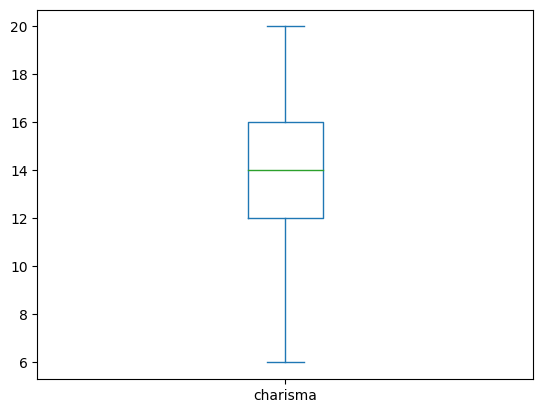

half.orc-------------------------------------


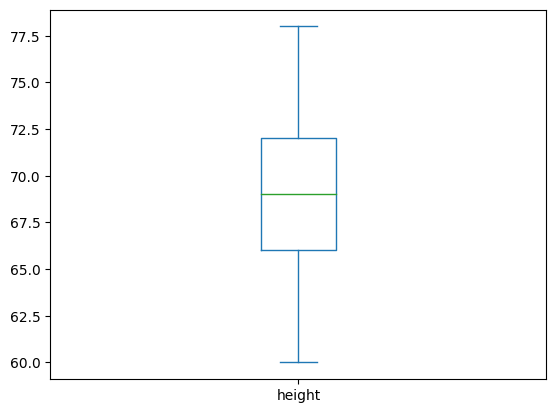

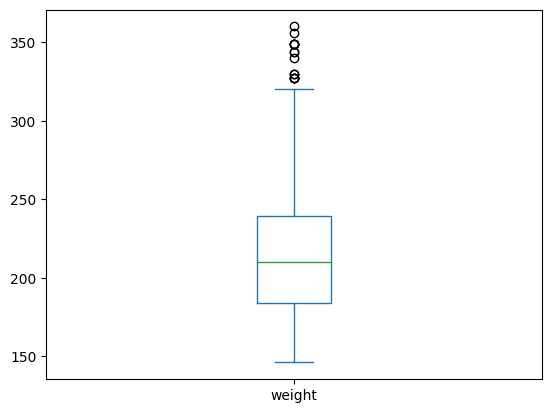

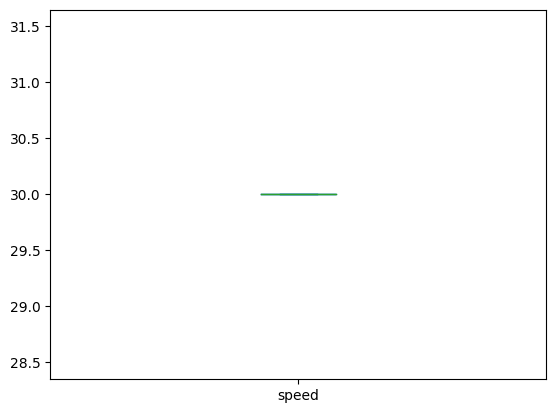

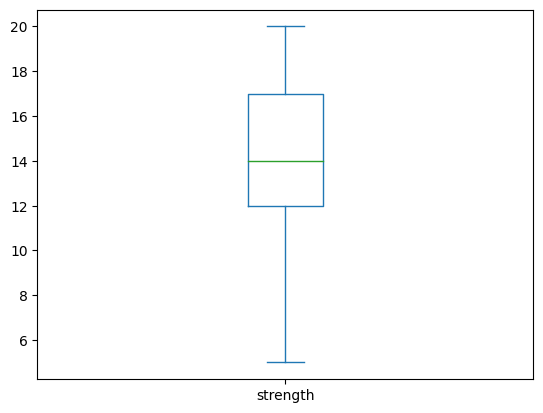

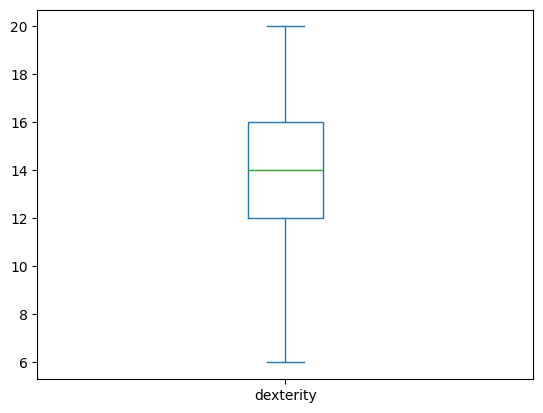

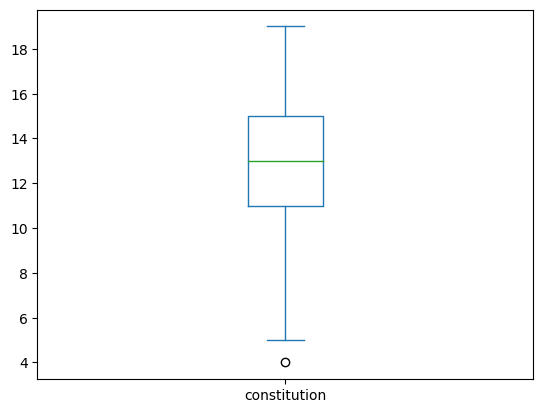

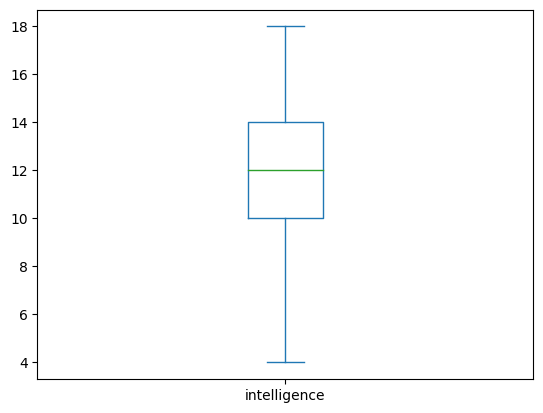

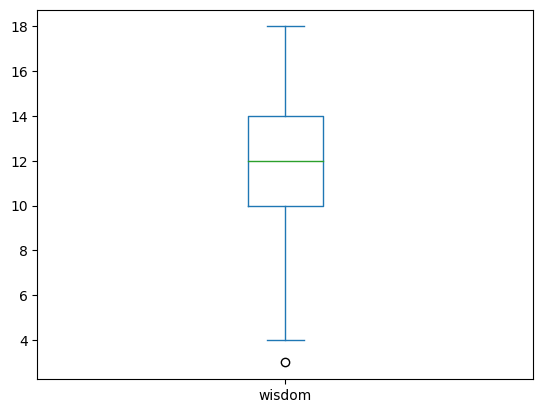

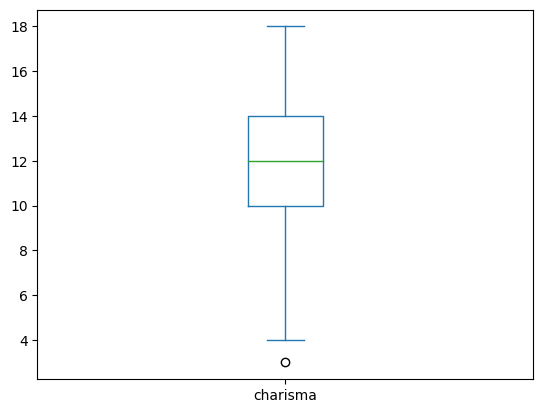

halfling-------------------------------------


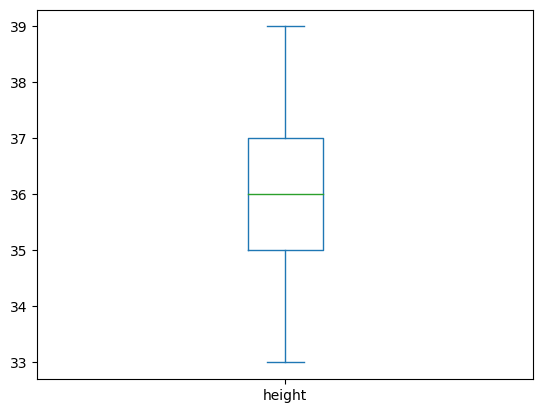

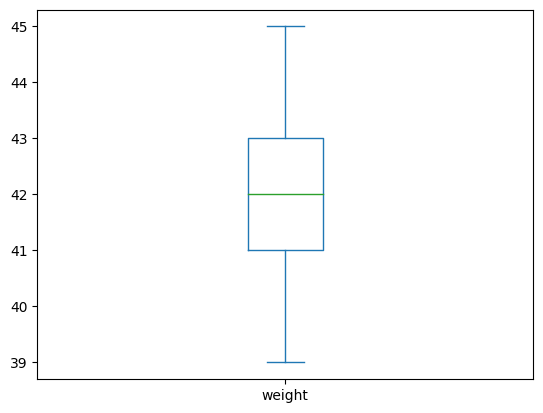

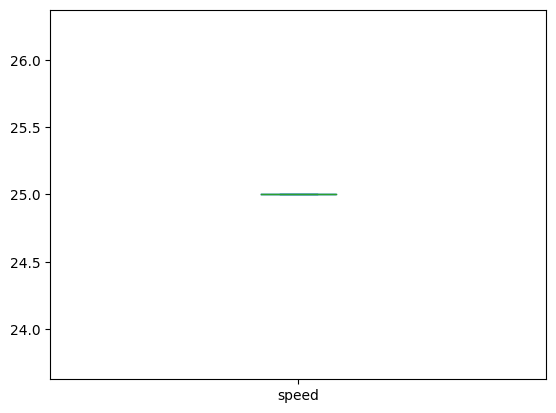

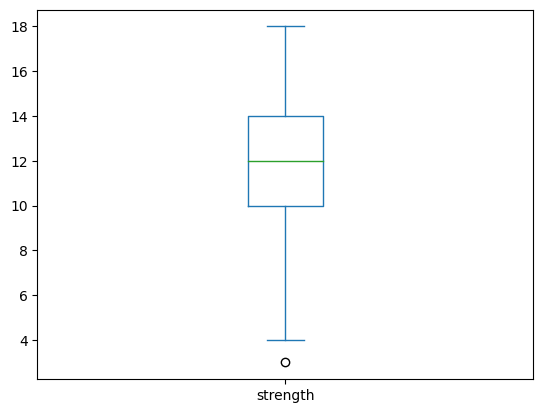

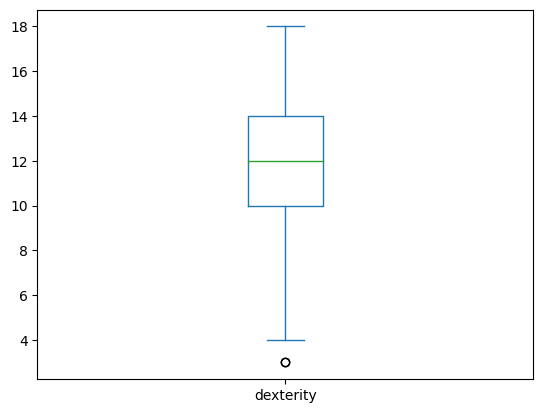

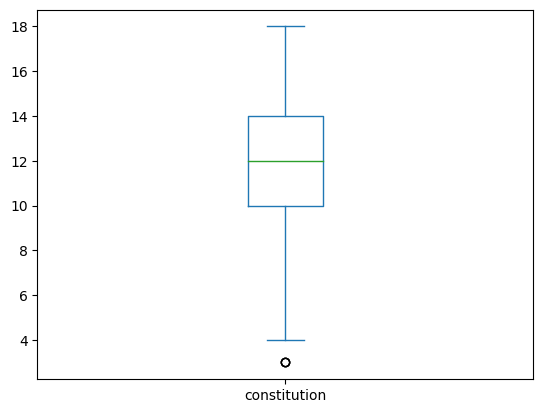

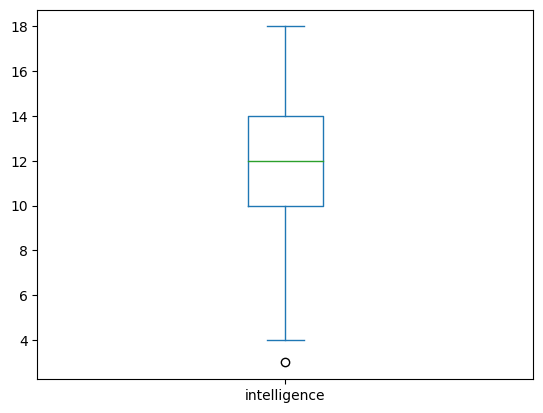

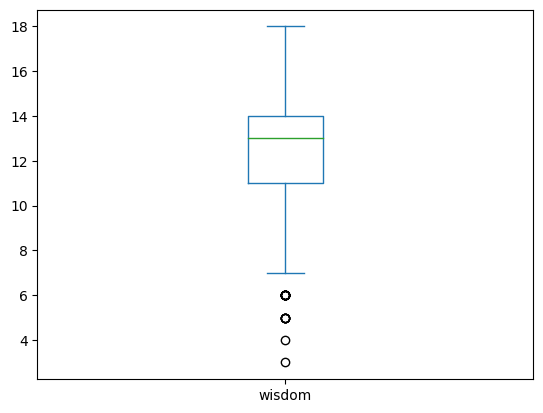

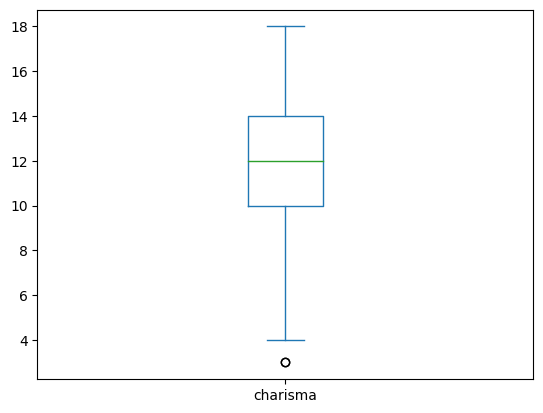

human-------------------------------------


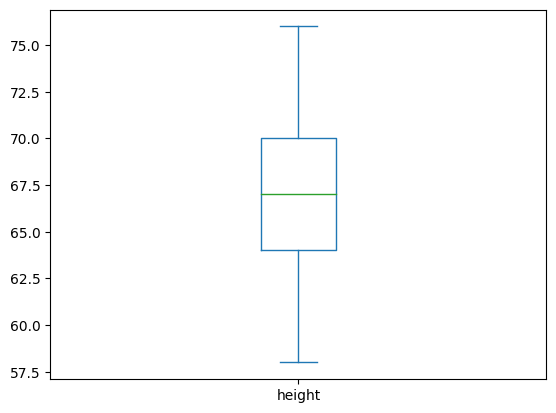

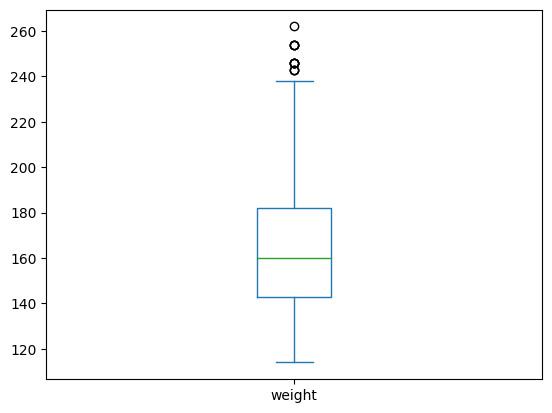

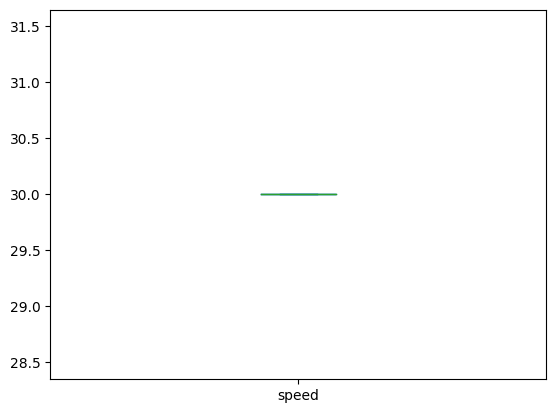

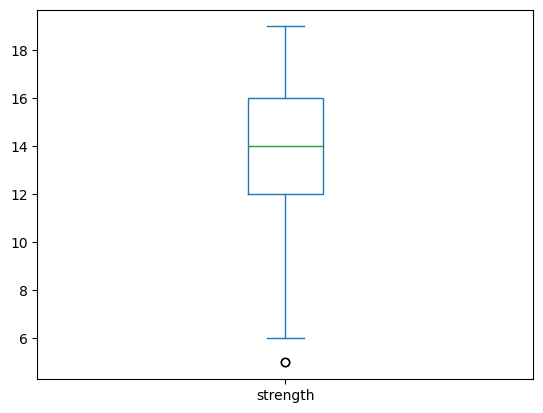

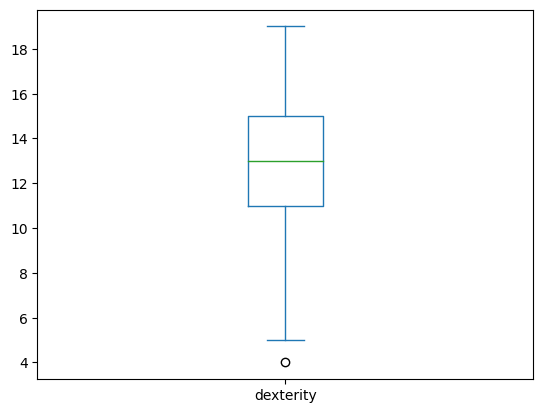

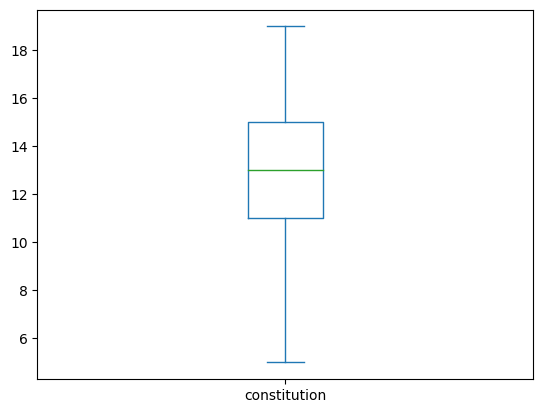

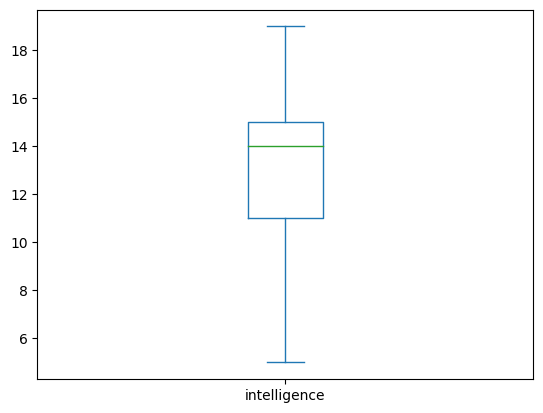

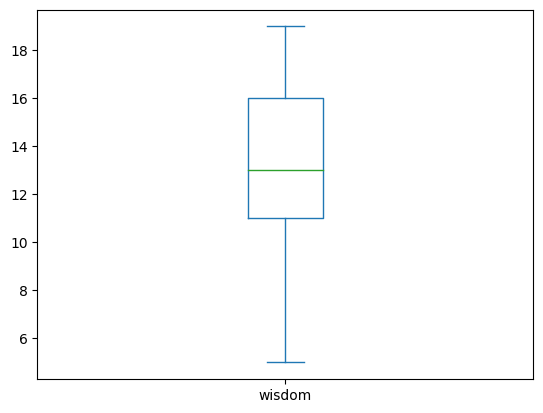

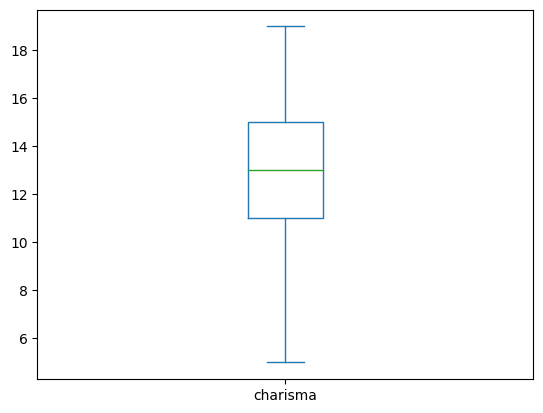

tiefling-------------------------------------


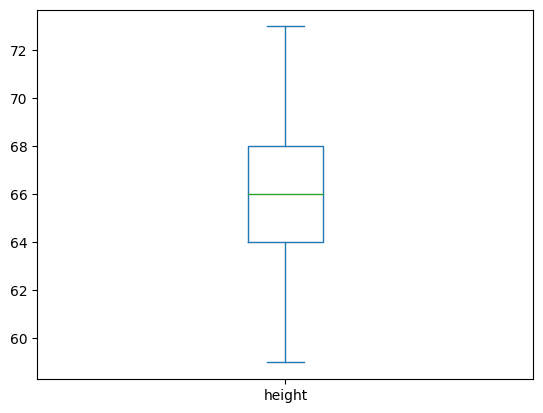

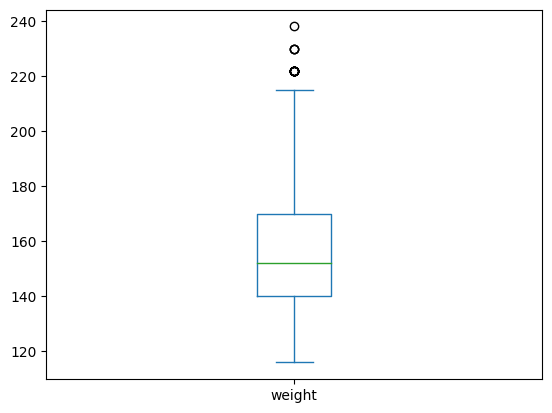

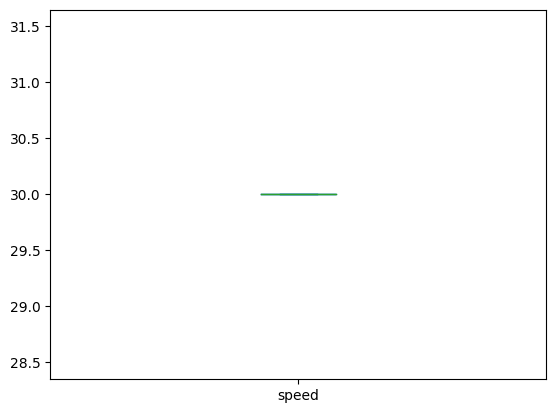

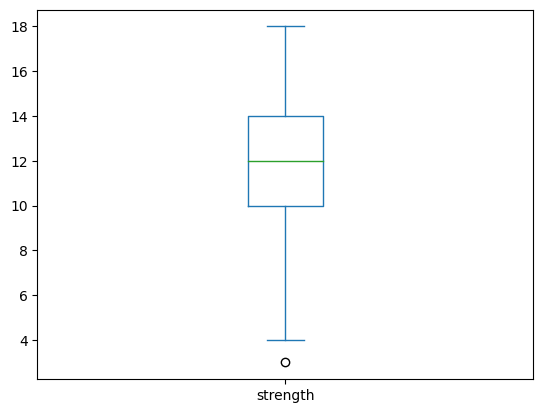

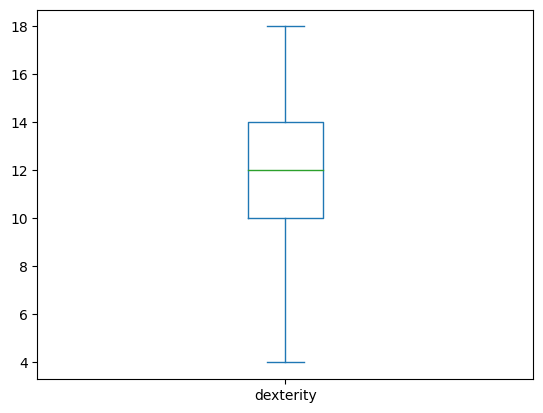

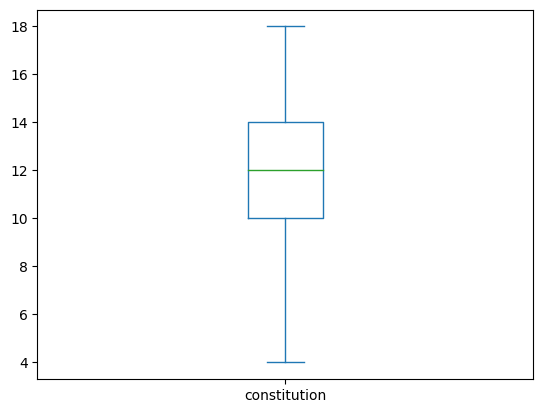

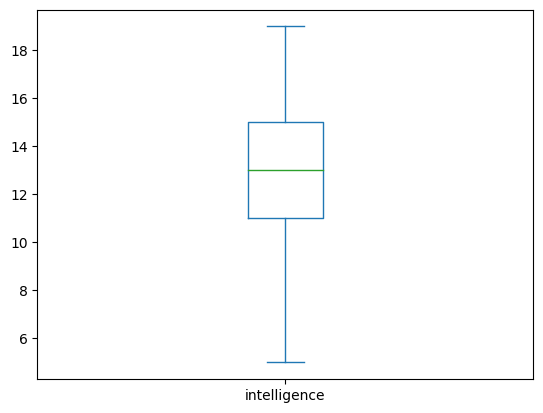

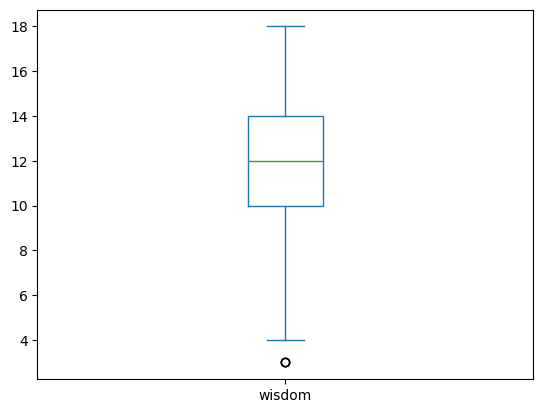

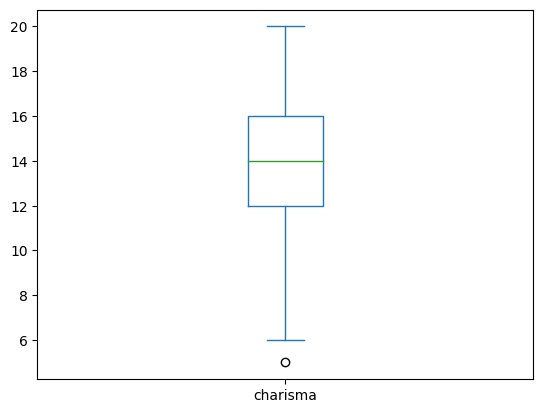

In [283]:
for i in range(len(raceuni)):
    result_df = pd.DataFrame(df.where(df["race"] == raceuni[i]))
    print(raceuni[i] + "-------------------------------------")
    for i in range(result_df.shape[1]-1):
        result_df[result_df.columns[i+1]].plot(kind='box')
        plt.show()

In [284]:
descPD = pd.DataFrame()
for i in range(len(raceuni)):
    result_df = pd.DataFrame(df.where(df["race"] == raceuni[i]))
    desc = result_df[result_df.columns[2]].describe()
    descPD[raceuni[i]] = desc

descPD

,dragonborn,dwarf,elf,gnome,half.elf,half.orc,halfling,human,tiefling
count,1144.000000,1095.000000,1112.000000,1121.000000,1086.000000,1067.000000,1135.000000,1120.000000,1120.000000
mean,239.993881,165.367123,145.755396,41.990187,155.132597,214.869728,41.963877,164.208036,155.867857
std,33.032831,17.305578,27.171215,1.532648,22.300191,40.005662,1.556553,27.701726,23.001155
min,179.000000,134.000000,94.000000,39.000000,114.000000,146.000000,39.000000,114.000000,116.000000
25%,215.000000,151.000000,125.000000,41.000000,138.000000,184.000000,41.000000,143.000000,140.000000
50%,235.000000,165.000000,144.000000,42.000000,152.000000,210.000000,42.000000,160.000000,152.000000
75%,259.000000,178.000000,162.000000,43.000000,170.000000,239.000000,43.000000,182.000000,170.000000
max,367.000000,226.000000,250.000000,45.000000,238.000000,360.000000,45.000000,262.000000,238.000000


In [285]:
descPD = pd.DataFrame()
for i in range(len(raceuni)):
    result_df = pd.DataFrame(df.where(df["race"] == raceuni[i]))
    desc = result_df[result_df.columns[1]].describe()
    descPD[raceuni[i]] = desc

descPD

,dragonborn,dwarf,elf,gnome,half.elf,half.orc,halfling,human,tiefling
count,1144.000000,1095.000000,1112.000000,1121.000000,1086.000000,1067.000000,1135.000000,1120.000000,1120.000000
mean,75.206294,52.953425,65.000899,39.990187,65.965009,68.900656,35.963877,66.792857,66.127679
std,3.279795,1.609110,3.972566,1.532648,3.303492,4.051205,1.556553,4.040008,3.278650
min,68.000000,50.000000,56.000000,37.000000,59.000000,60.000000,33.000000,58.000000,59.000000
25%,73.000000,52.000000,62.000000,39.000000,64.000000,66.000000,35.000000,64.000000,64.000000
50%,75.000000,53.000000,65.000000,40.000000,66.000000,69.000000,36.000000,67.000000,66.000000
75%,78.000000,54.000000,68.000000,41.000000,68.000000,72.000000,37.000000,70.000000,68.000000
max,82.000000,56.000000,74.000000,43.000000,73.000000,78.000000,39.000000,76.000000,73.000000


dragonborn-------------------------------------


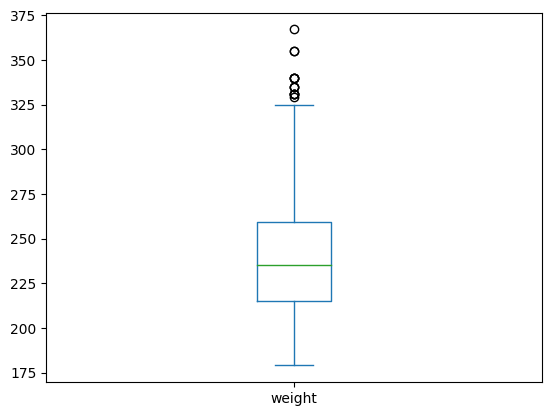

dwarf-------------------------------------


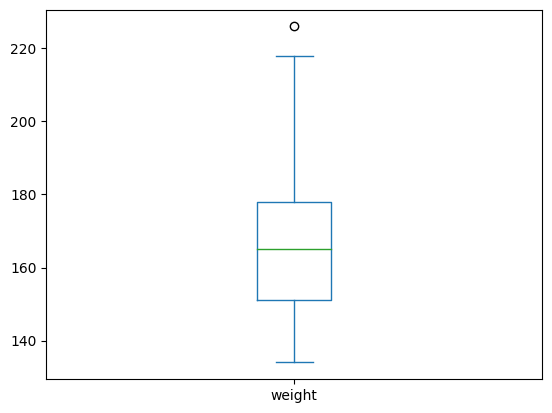

elf-------------------------------------


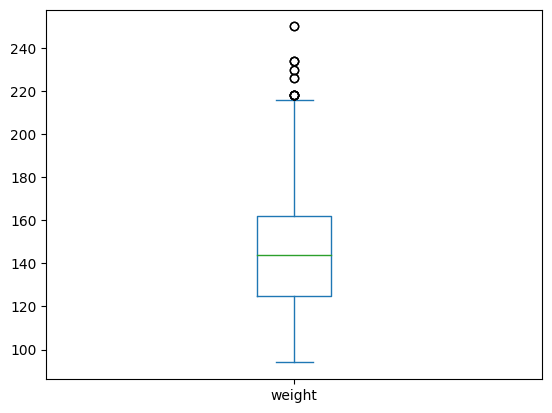

gnome-------------------------------------


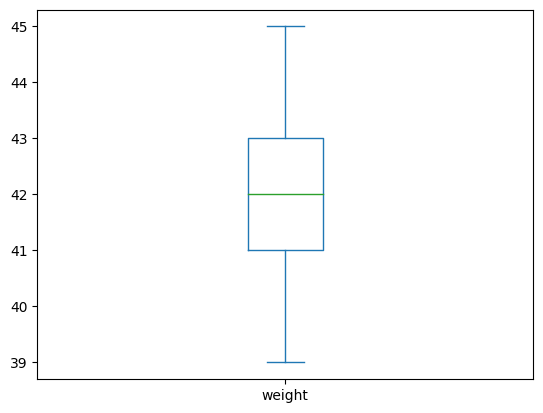

half.elf-------------------------------------


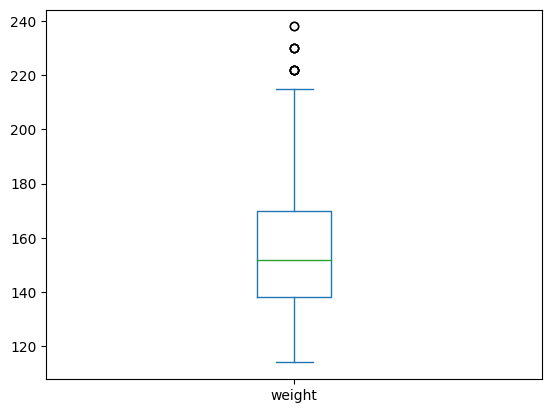

half.orc-------------------------------------


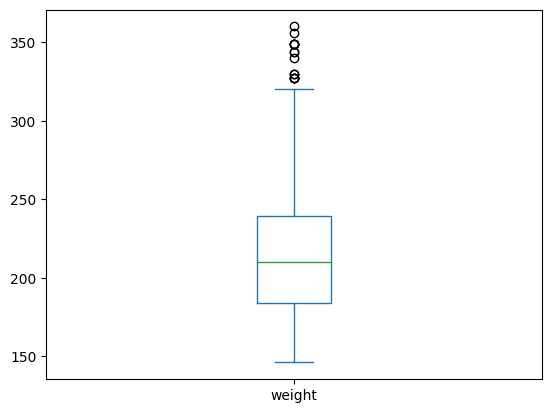

halfling-------------------------------------


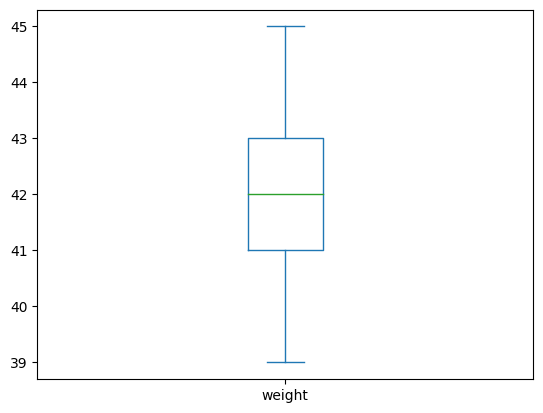

human-------------------------------------


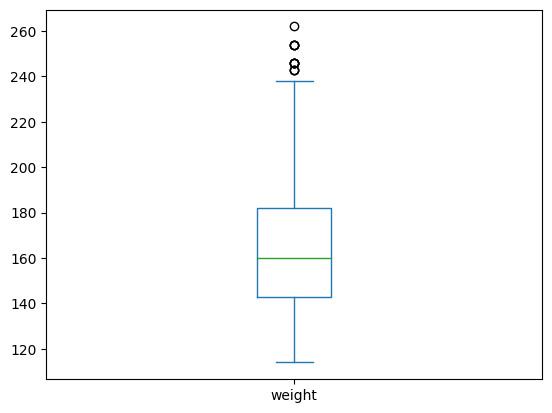

tiefling-------------------------------------


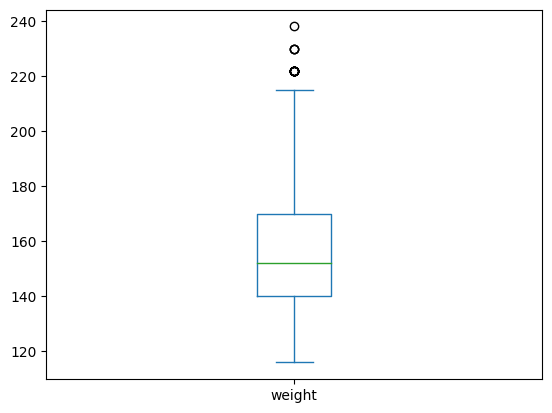

In [286]:
for i in range(len(raceuni)):
    result_df = pd.DataFrame(df.where(df["race"] == raceuni[i]))
    print(raceuni[i] + "-------------------------------------")
    result_df[result_df.columns[2]].plot(kind='box')
    plt.show()



In [287]:
columns_to_check = df.columns 

columns_to_check= list(columns_to_check)

print(columns_to_check) 

['race', 'height', 'weight', 'speed', 'strength', 'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma']


In [288]:
columns_to_check.remove('race')

print(columns_to_check) 

['height', 'weight', 'speed', 'strength', 'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma']


In [289]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Iterate over each race and column, remove outliers
for race in df['race'].unique():
    race_df = df[df['race'] == race]
    for col in columns_to_check:
        outliers = detect_outliers(race_df, col)
        df = df.drop(outliers.index)

# Resulting DataFrame without outliers
print(df)

            race  height  weight  speed  strength  dexterity  constitution  \
0     dragonborn      79     279     30        14         15            12   
2     dragonborn      71     230     30        14         16            11   
3     dragonborn      75     265     30         8         19             7   
4     dragonborn      72     229     30         8         17            14   
5     dragonborn      72     217     30        16         10            12   
...          ...     ...     ...    ...       ...        ...           ...   
9994    tiefling      70     175     30        15          9             5   
9995    tiefling      63     146     30        13         18            17   
9997    tiefling      66     137     30         4          5            16   
9998    tiefling      68     143     30        12         16            12   
9999    tiefling      70     201     30        16         17            15   

      intelligence  wisdom  charisma  
0                7      

dragonborn-------------------------------------


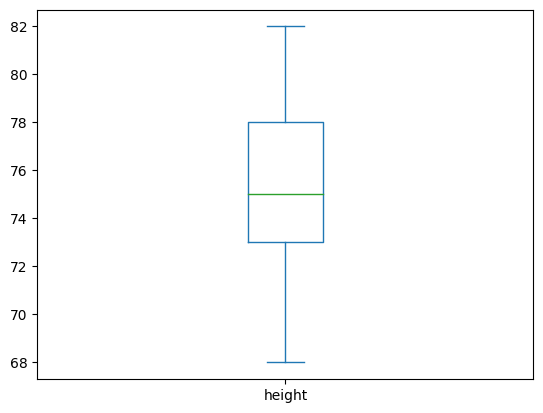

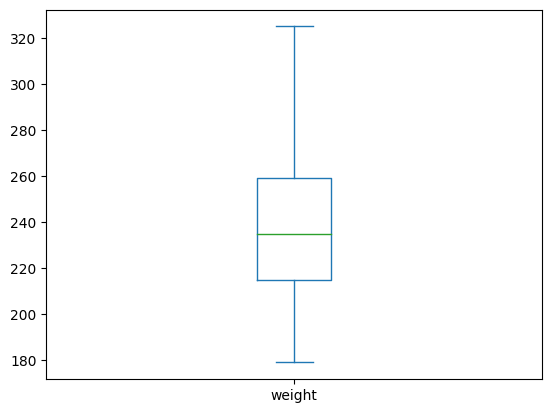

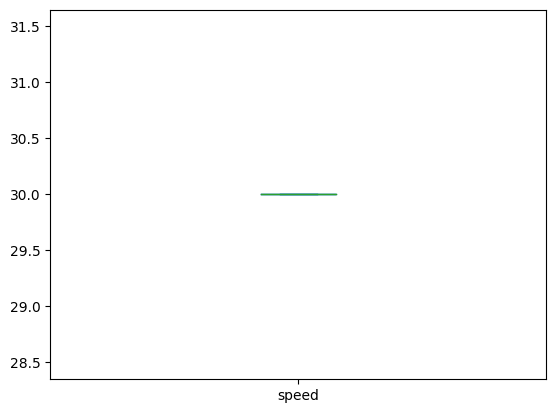

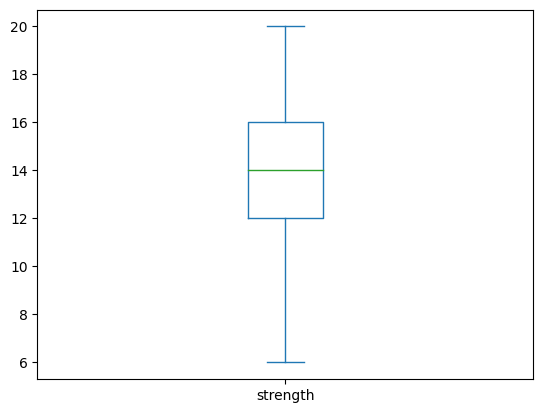

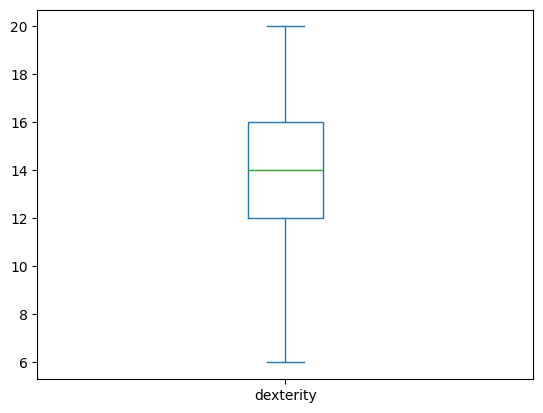

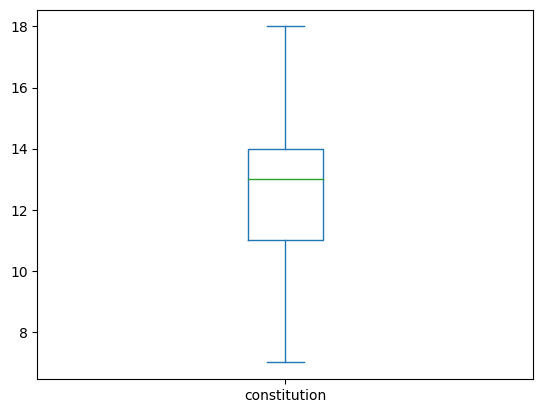

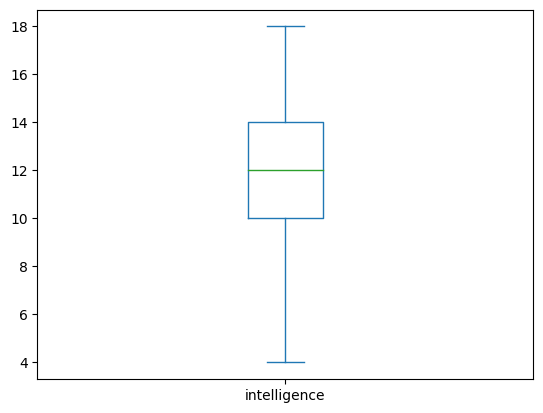

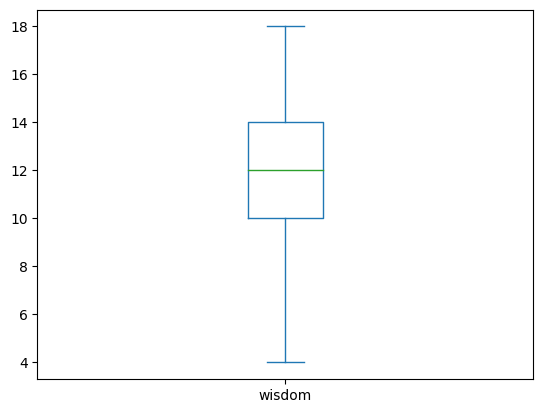

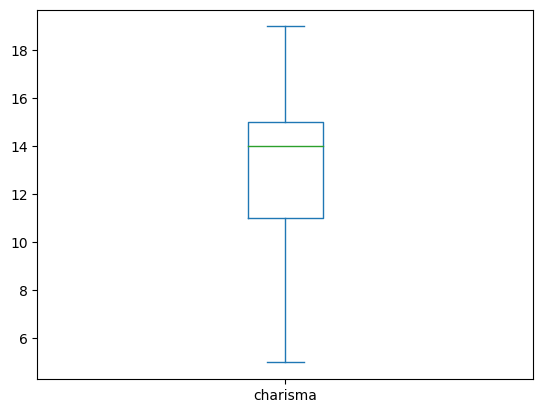

dwarf-------------------------------------


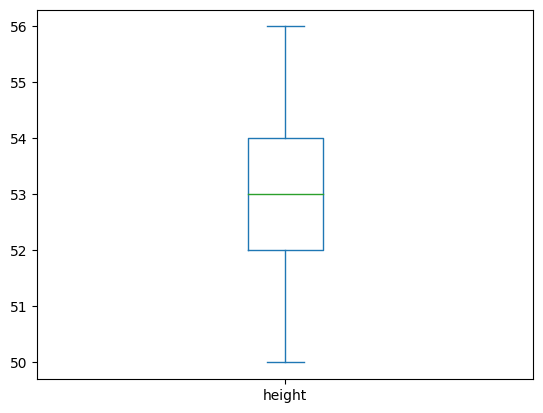

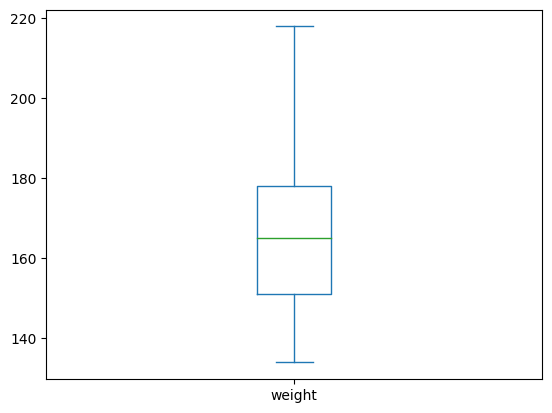

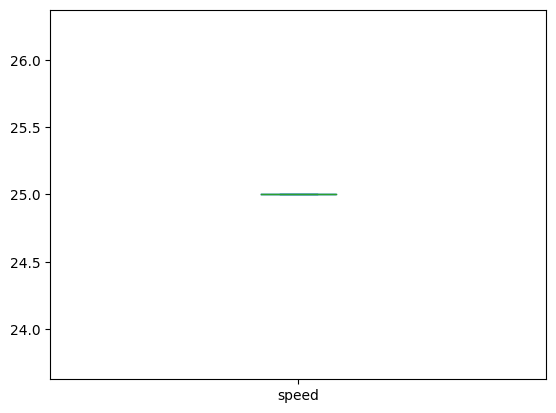

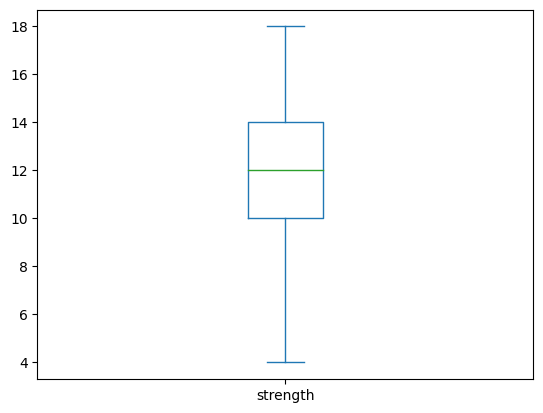

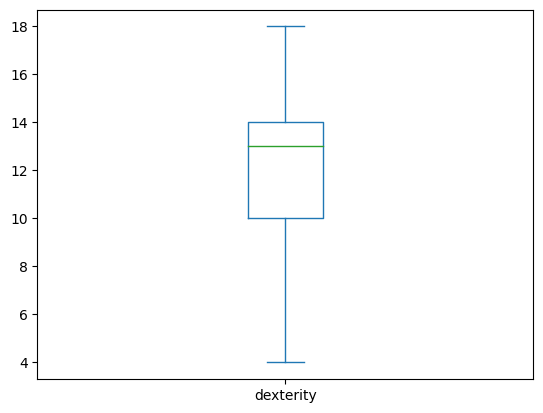

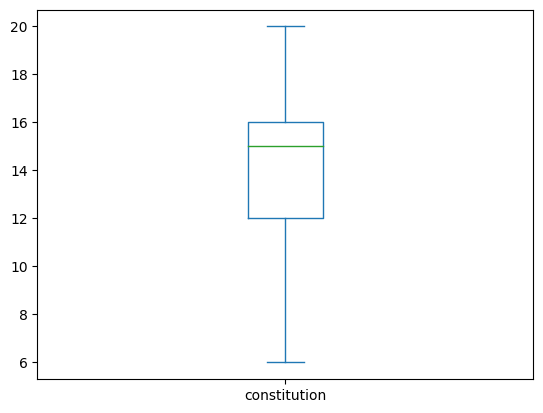

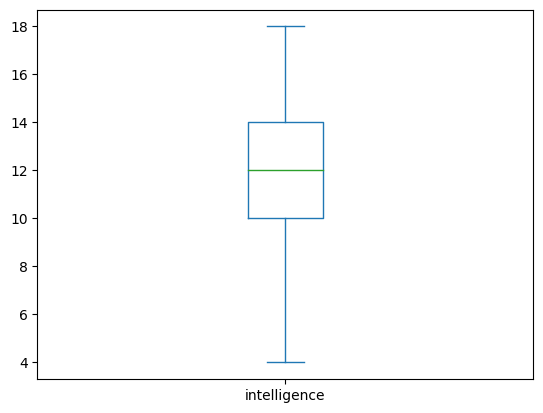

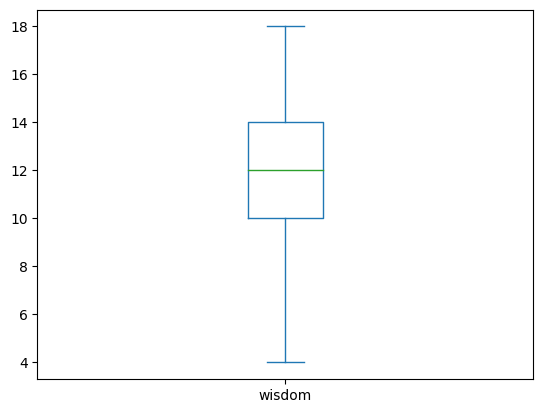

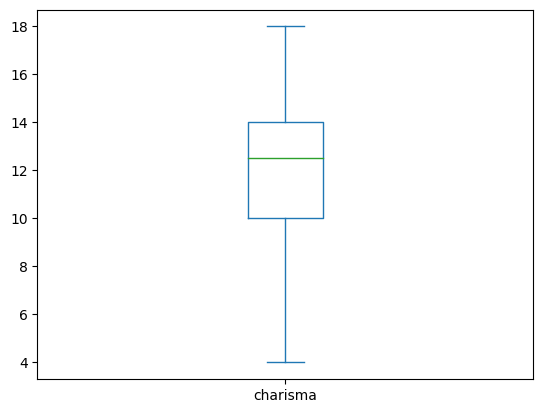

elf-------------------------------------


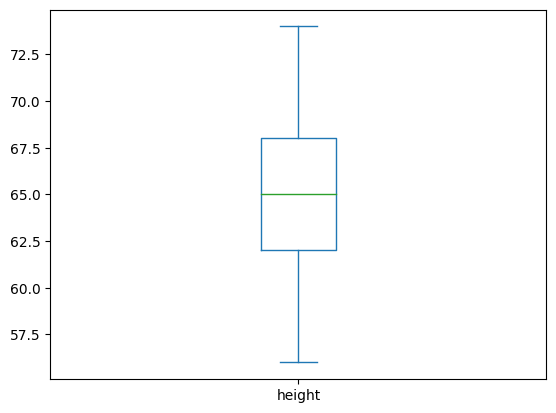

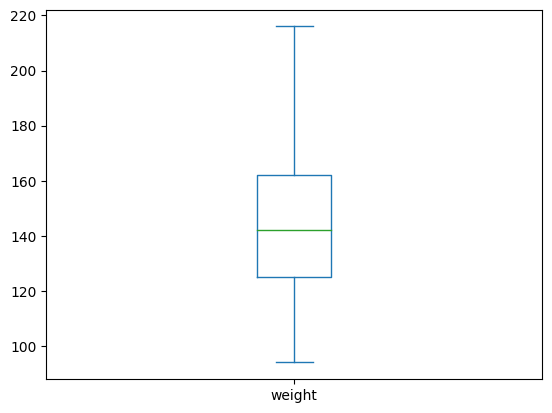

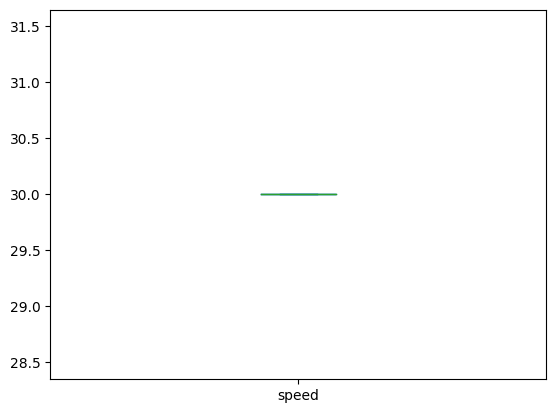

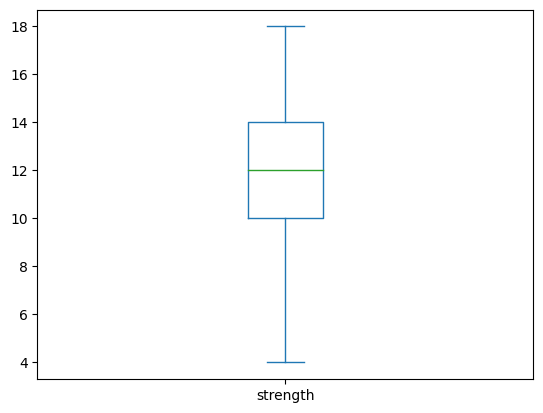

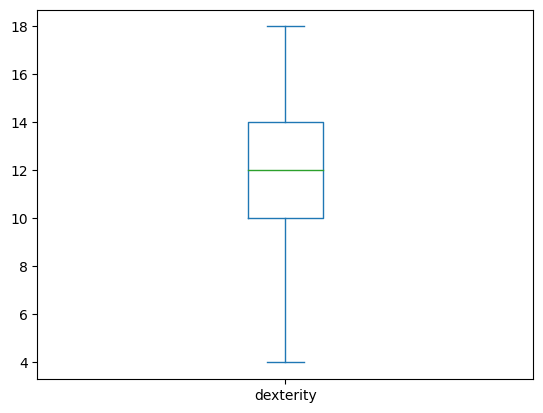

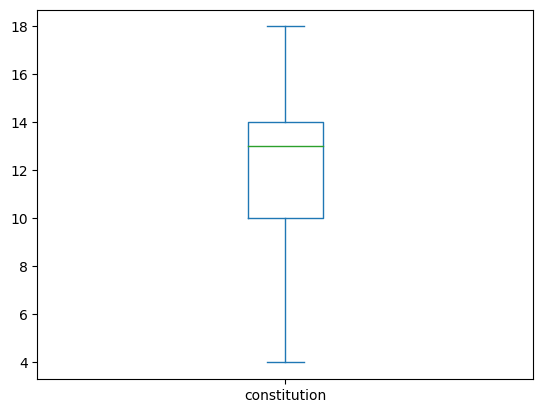

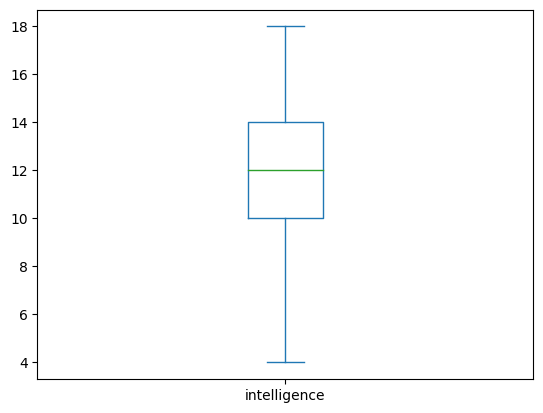

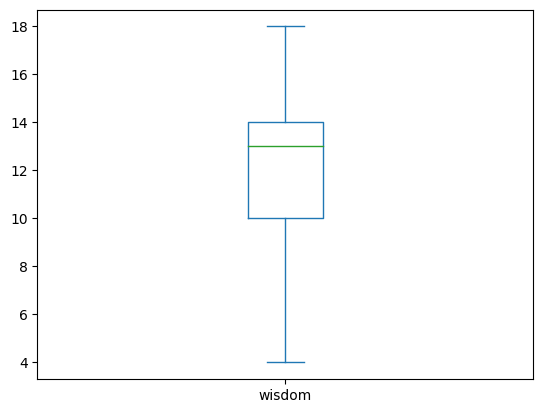

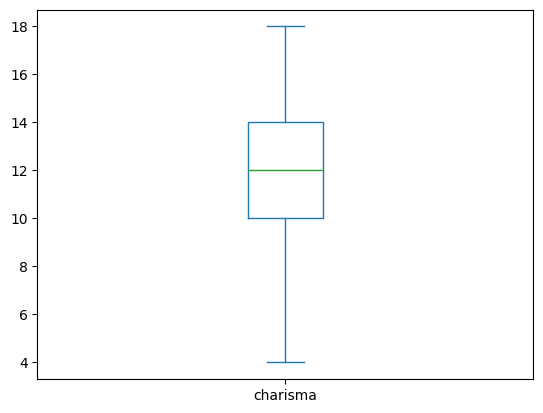

gnome-------------------------------------


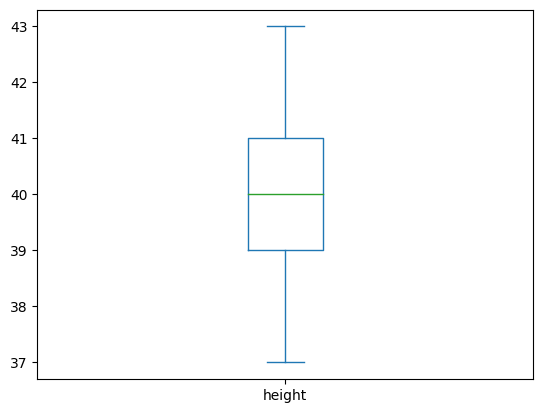

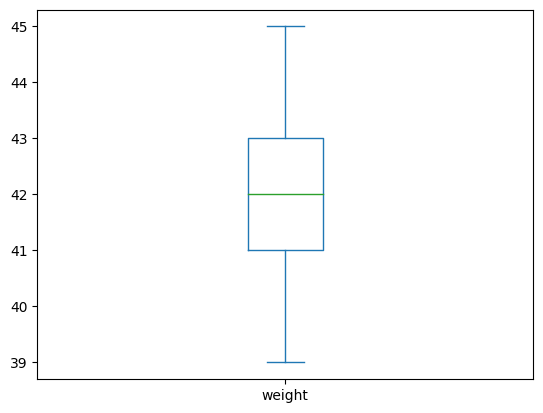

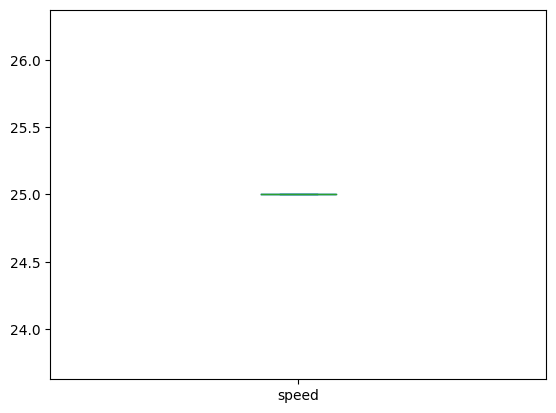

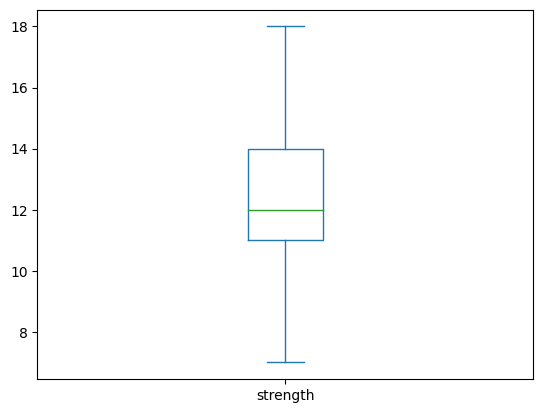

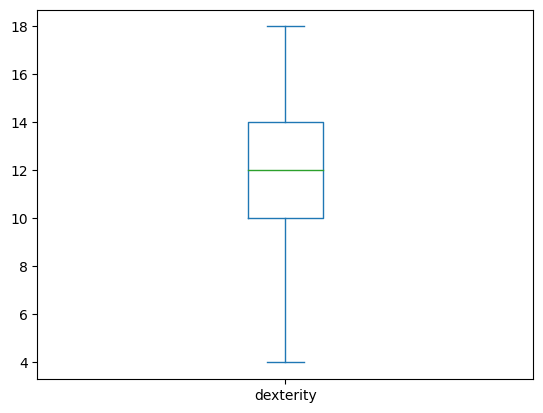

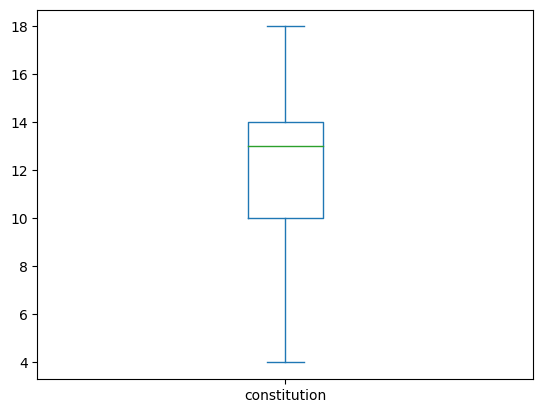

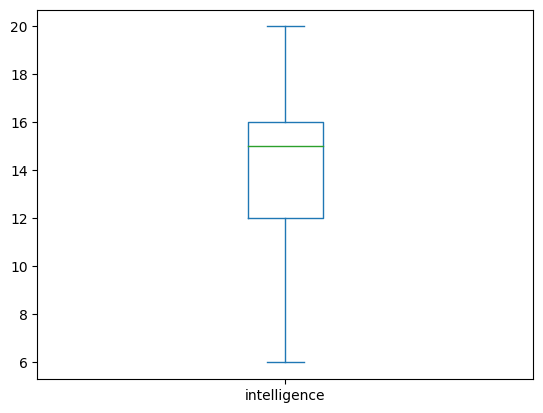

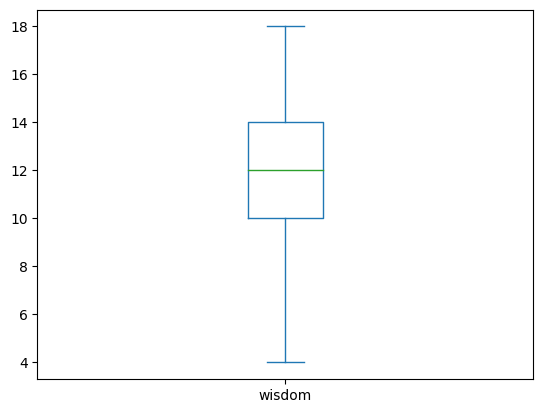

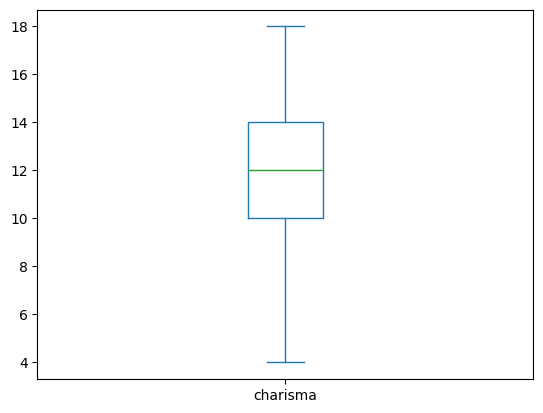

half.elf-------------------------------------


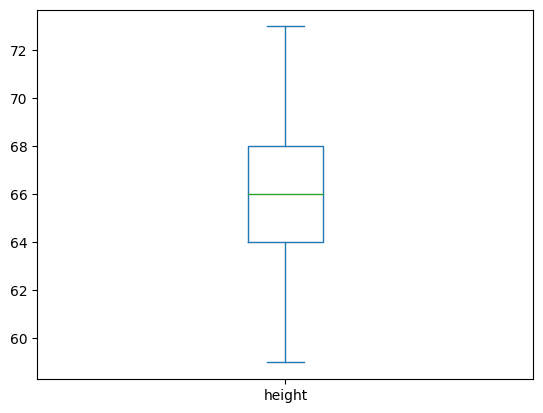

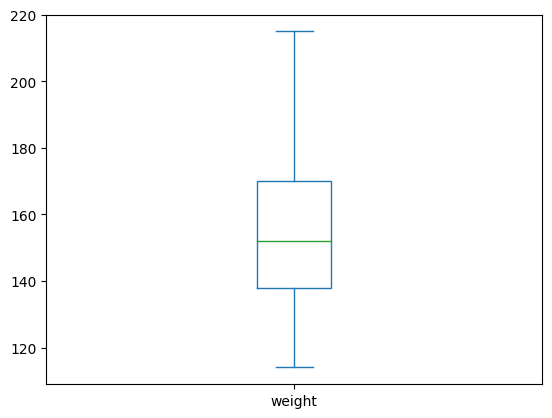

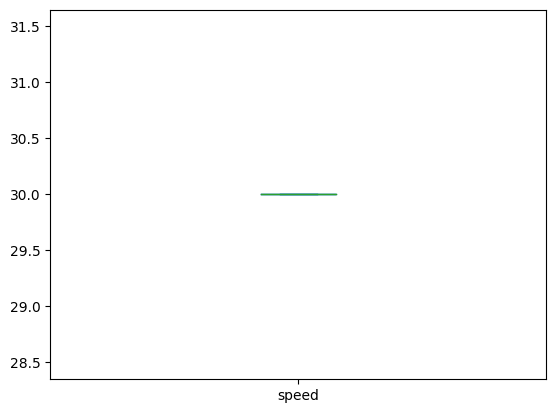

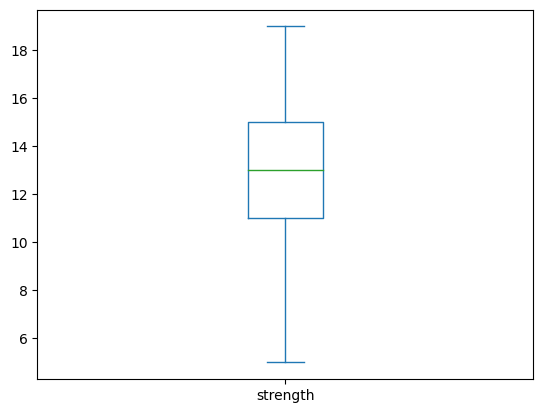

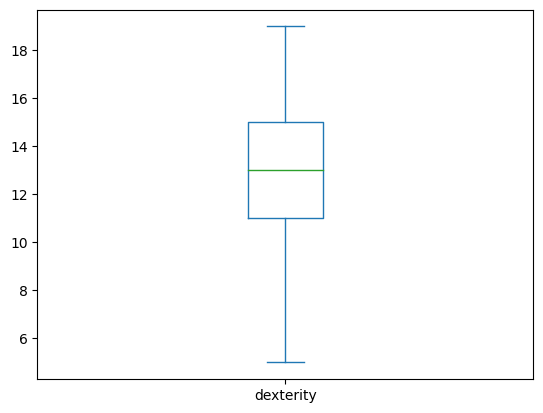

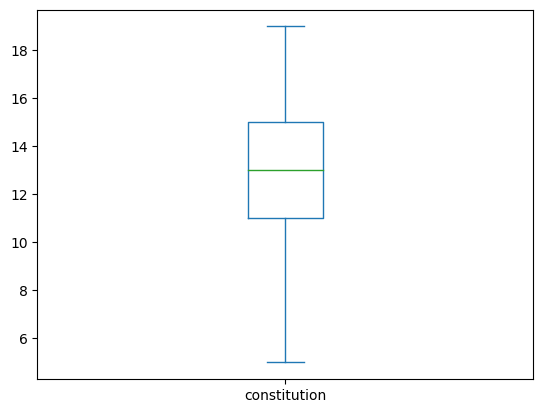

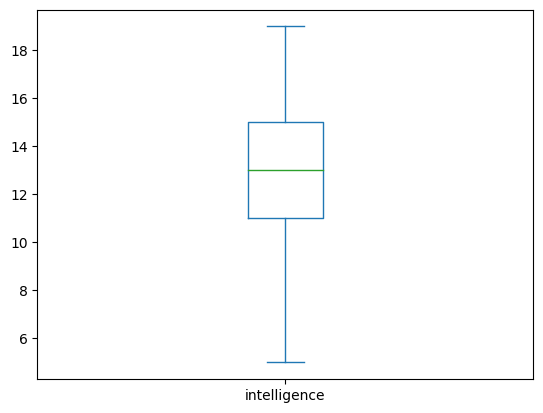

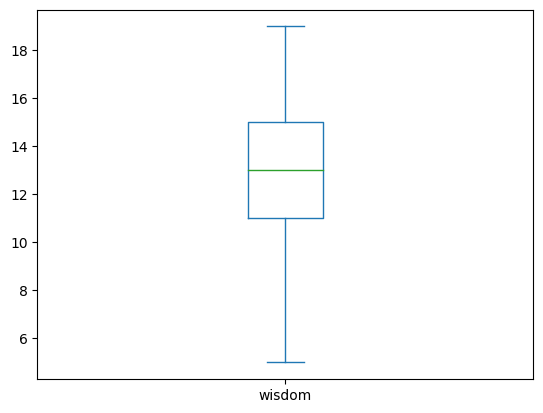

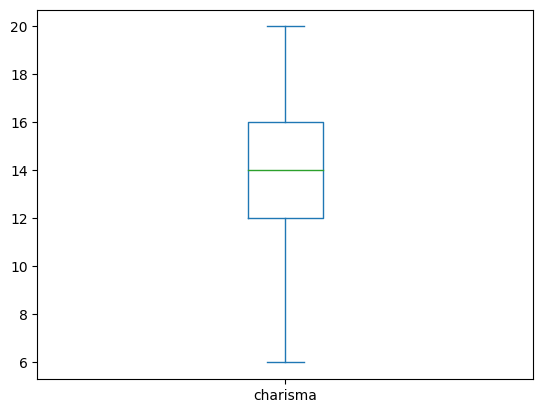

half.orc-------------------------------------


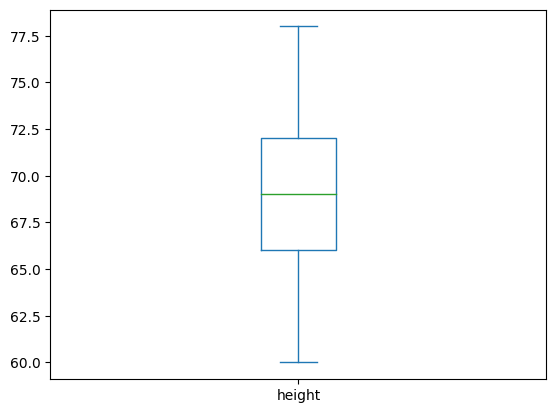

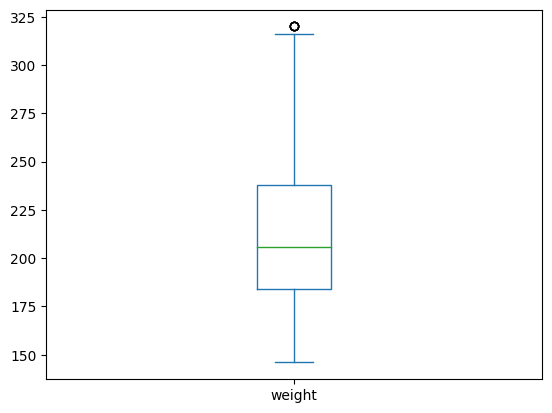

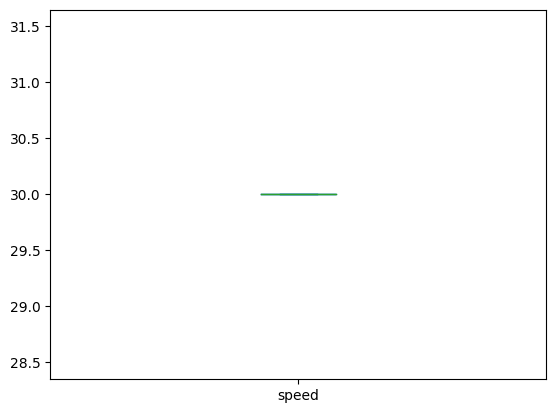

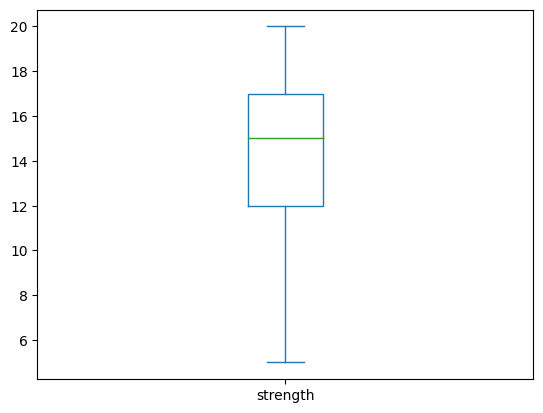

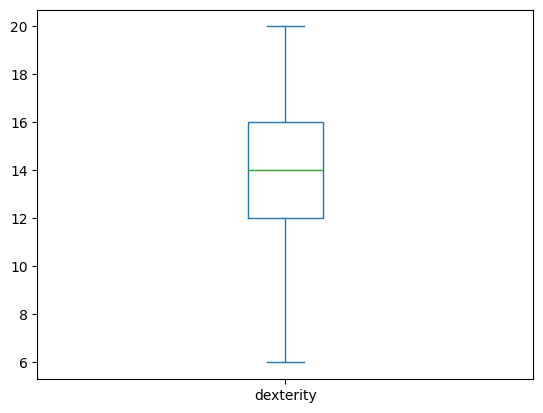

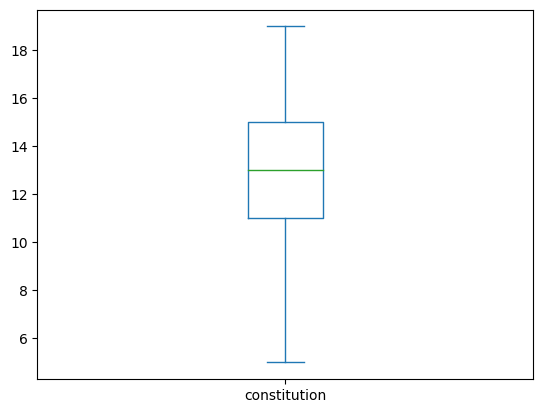

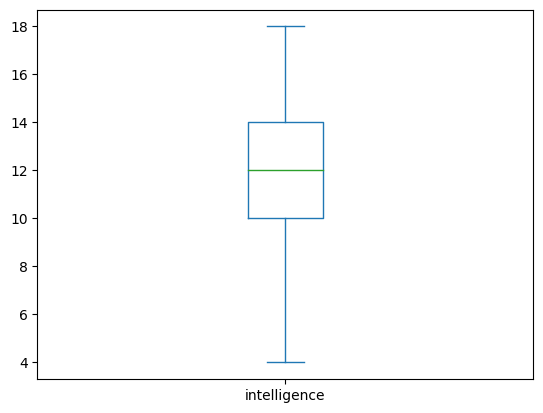

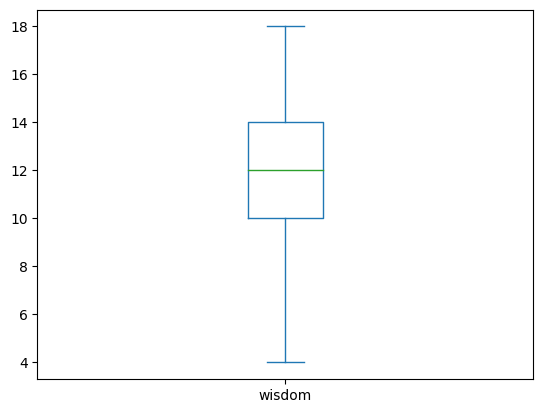

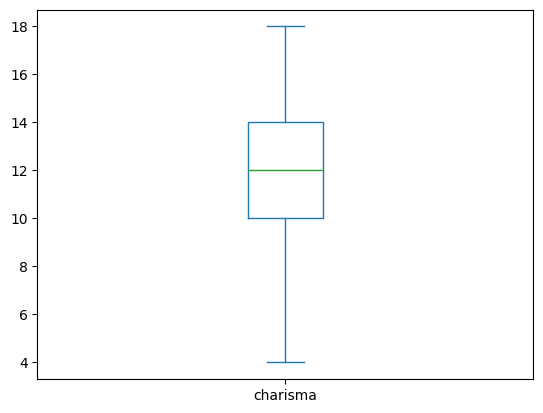

halfling-------------------------------------


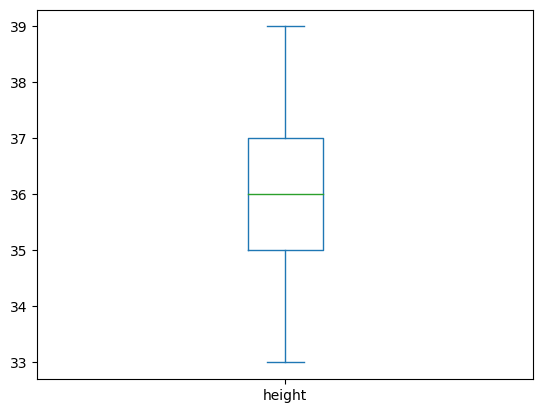

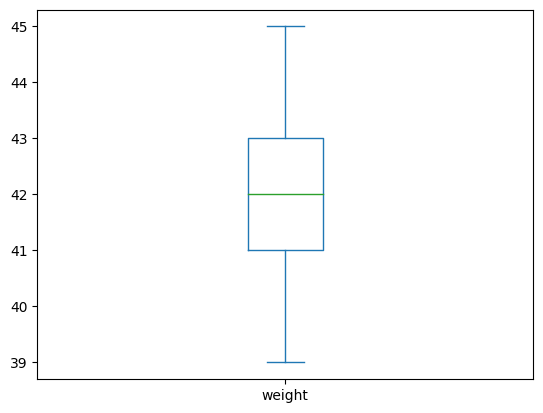

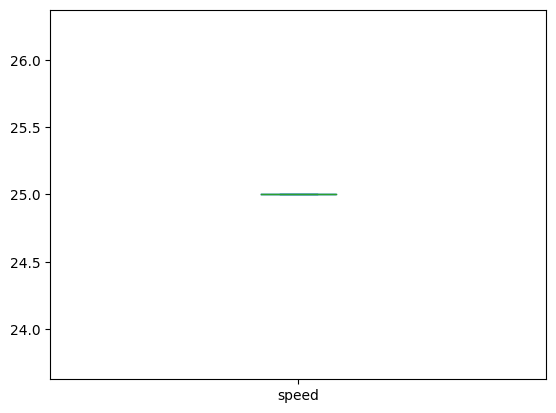

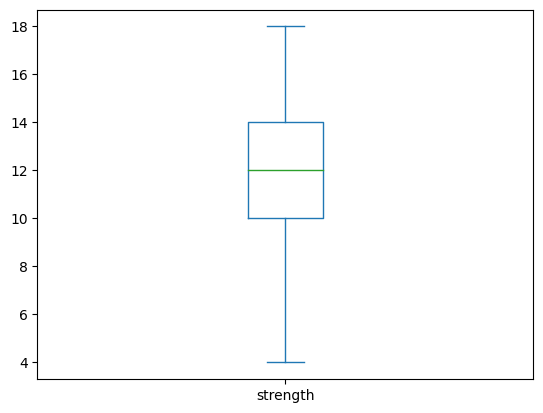

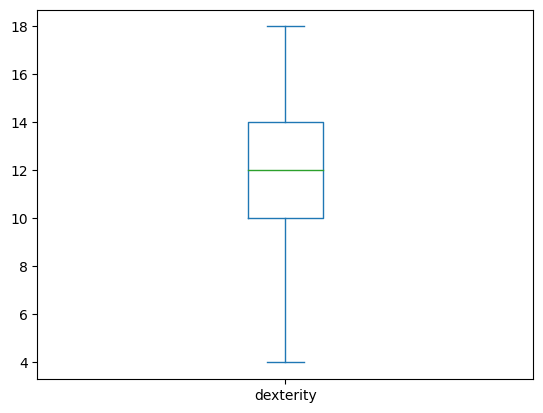

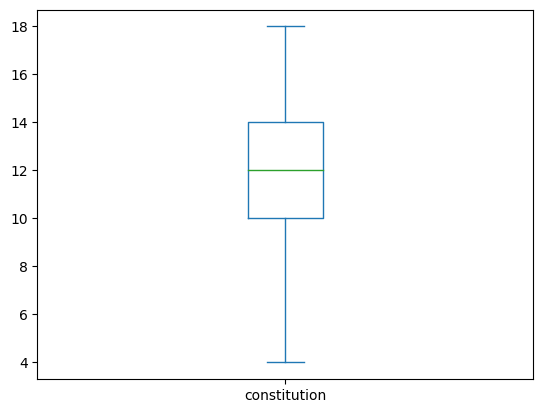

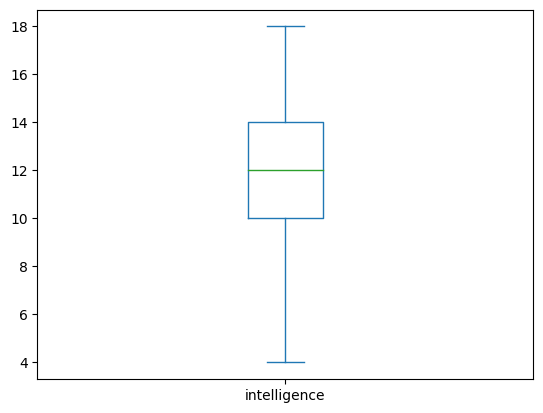

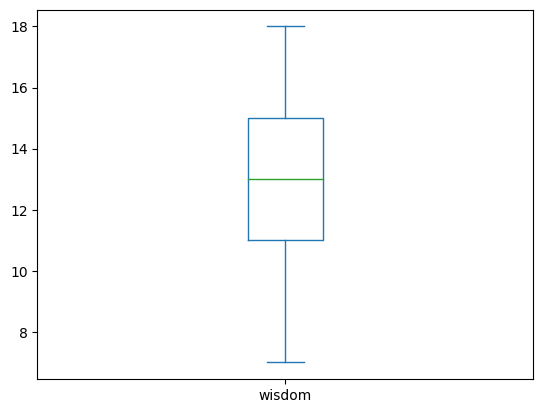

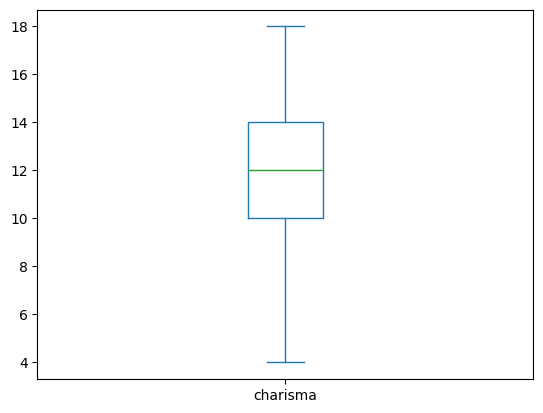

human-------------------------------------


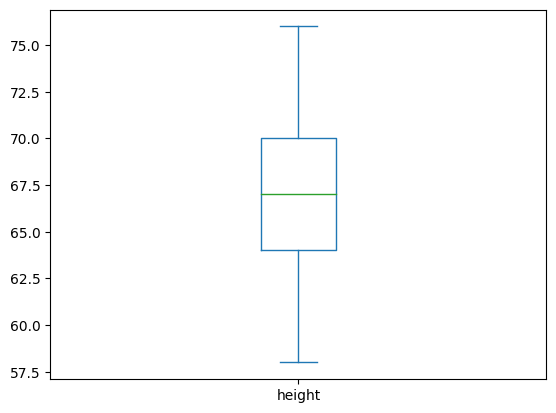

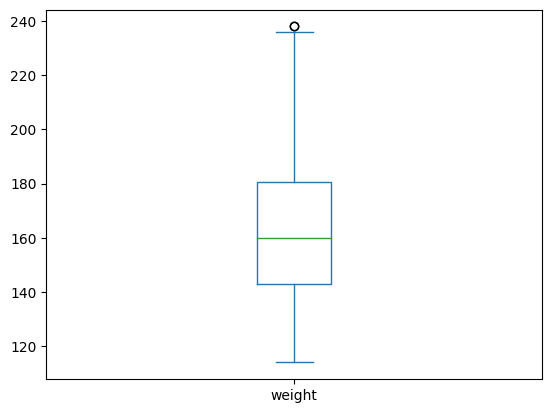

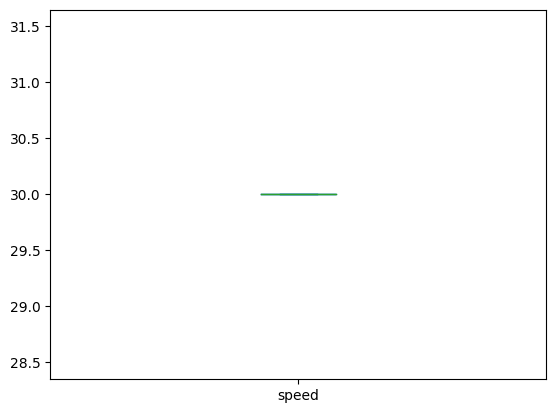

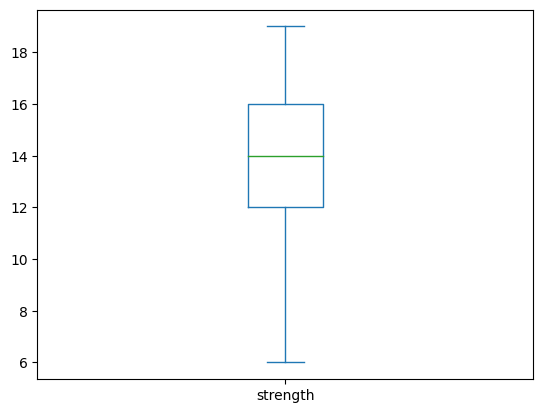

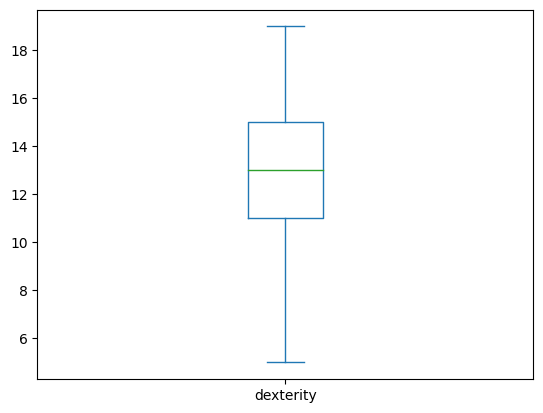

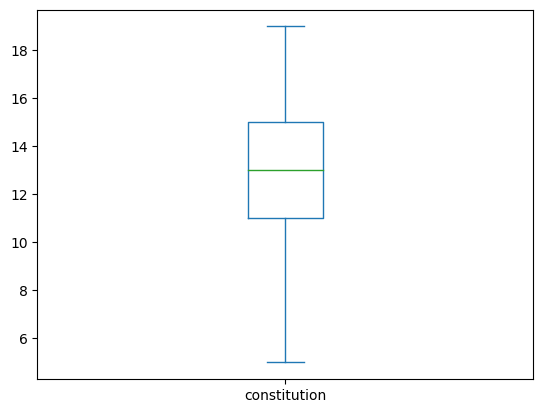

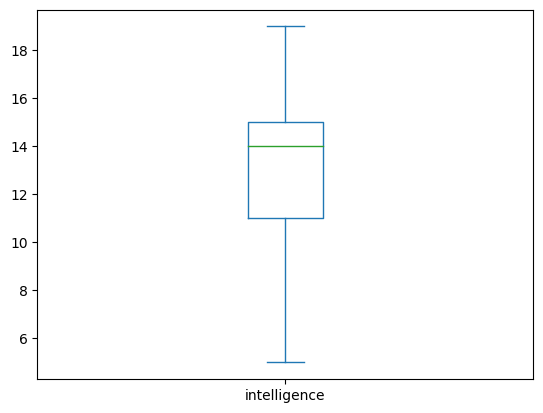

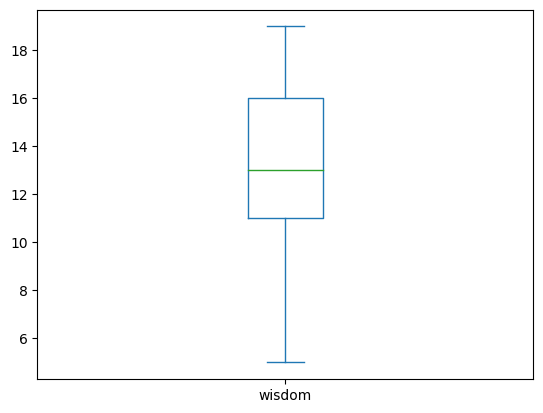

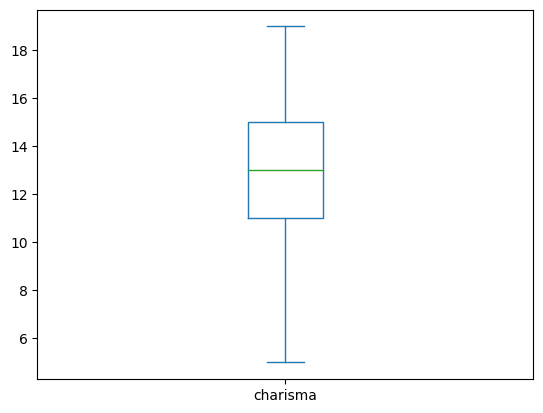

tiefling-------------------------------------


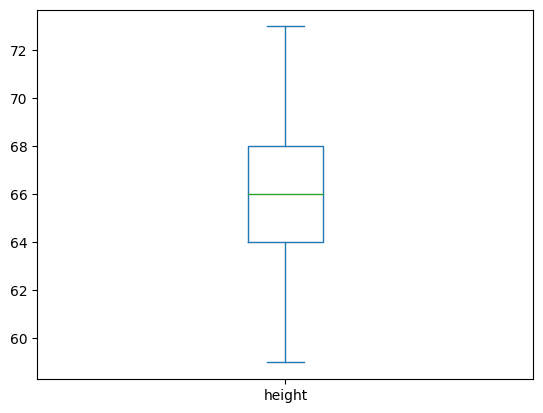

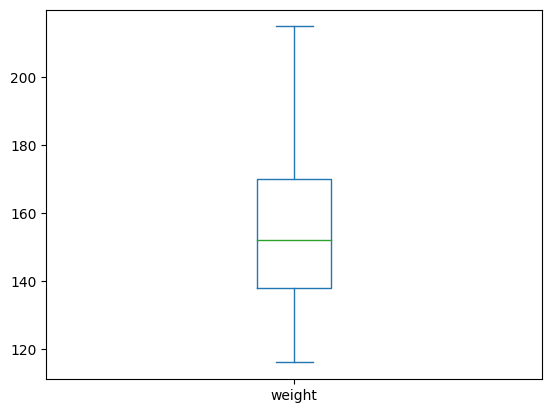

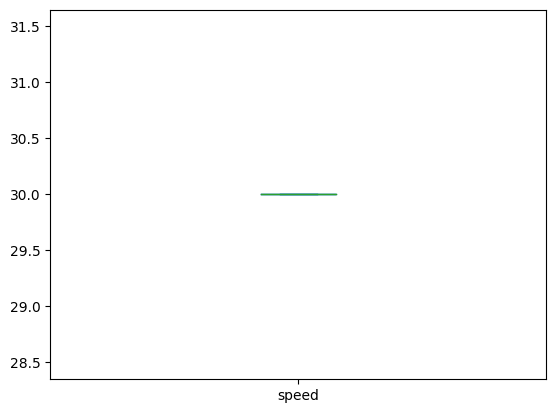

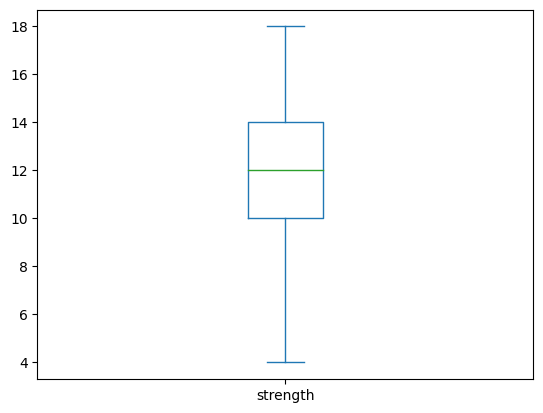

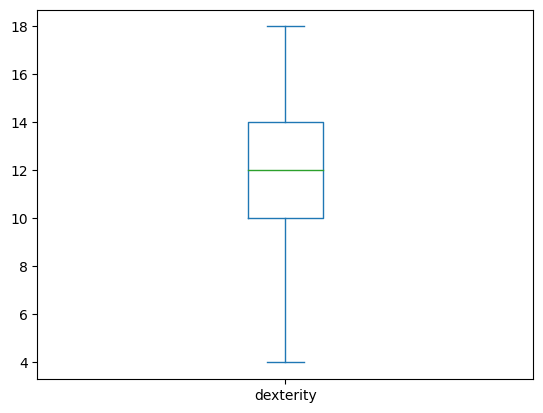

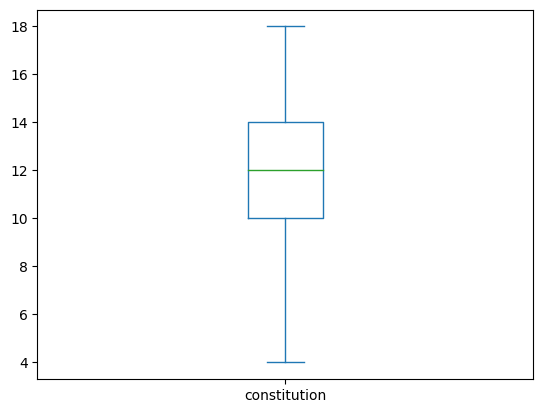

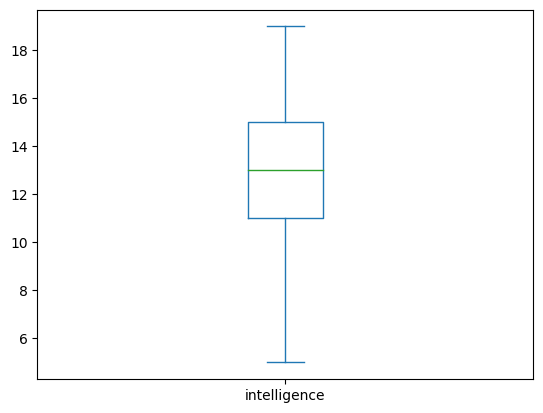

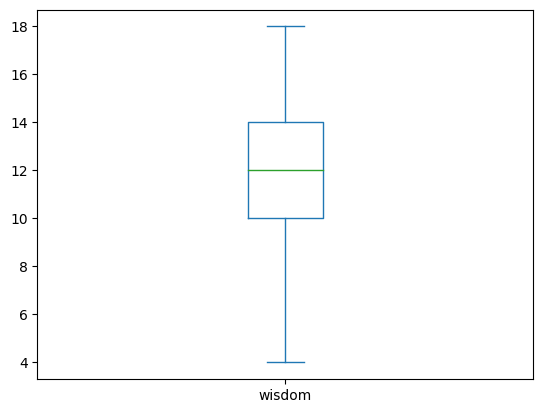

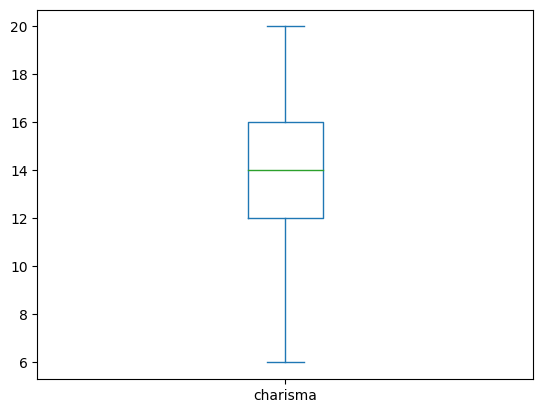

In [290]:

for i in range(len(raceuni)):
    result_df = pd.DataFrame(df.where(df["race"] == raceuni[i]))
    print(raceuni[i] + "-------------------------------------")
    for i in range(result_df.shape[1]-1):
        result_df[result_df.columns[i+1]].plot(kind='box')
        plt.show()

In [291]:
descPD = pd.DataFrame()
for i in range(len(raceuni)):
    result_df = pd.DataFrame(df.where(df["race"] == raceuni[i]))
    desc = result_df[result_df.columns[2]].describe()
    descPD[raceuni[i]] = desc

descPD

,dragonborn,dwarf,elf,gnome,half.elf,half.orc,halfling,human,tiefling
count,1102.000000,1090.000000,1094.000000,1088.000000,1061.000000,1049.000000,1103.000000,1104.000000,1099.000000
mean,238.605263,165.260550,144.595978,41.990809,154.221489,213.135367,41.970988,163.159420,154.818016
std,31.040703,17.186601,25.565792,1.533408,21.039651,37.286860,1.561525,26.282722,21.588670
min,179.000000,134.000000,94.000000,39.000000,114.000000,146.000000,39.000000,114.000000,116.000000
25%,215.000000,151.000000,125.000000,41.000000,138.000000,184.000000,41.000000,143.000000,138.000000
50%,235.000000,165.000000,142.000000,42.000000,152.000000,206.000000,42.000000,160.000000,152.000000
75%,259.000000,178.000000,162.000000,43.000000,170.000000,238.000000,43.000000,180.500000,170.000000
max,325.000000,218.000000,216.000000,45.000000,215.000000,320.000000,45.000000,238.000000,215.000000


In [292]:
descPD = pd.DataFrame()
for i in range(len(raceuni)):
    result_df = pd.DataFrame(df.where(df["race"] == raceuni[i]))
    desc = result_df[result_df.columns[1]].describe()
    descPD[raceuni[i]] = desc

descPD

,dragonborn,dwarf,elf,gnome,half.elf,half.orc,halfling,human,tiefling
count,1102.000000,1090.000000,1094.000000,1088.000000,1061.000000,1049.000000,1103.000000,1104.000000,1099.000000
mean,75.124319,52.947706,64.904022,39.990809,65.890669,68.795996,35.970988,66.705616,66.042766
std,3.229064,1.606924,3.919702,1.533408,3.251316,3.970591,1.561525,3.992210,3.233053
min,68.000000,50.000000,56.000000,37.000000,59.000000,60.000000,33.000000,58.000000,59.000000
25%,73.000000,52.000000,62.000000,39.000000,64.000000,66.000000,35.000000,64.000000,64.000000
50%,75.000000,53.000000,65.000000,40.000000,66.000000,69.000000,36.000000,67.000000,66.000000
75%,78.000000,54.000000,68.000000,41.000000,68.000000,72.000000,37.000000,70.000000,68.000000
max,82.000000,56.000000,74.000000,43.000000,73.000000,78.000000,39.000000,76.000000,73.000000


In [293]:
df_9 = df.copy()

for i in  range(df.shape[1]-6):
   df_9[df_9.columns[i+1]]=df[df.columns[i+1]]**4


df_9

,race,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma
0,dragonborn,38950081,6059221281,810000,38416,15,12,7,13,16
2,dragonborn,25411681,2798410000,810000,38416,16,11,13,10,18
3,dragonborn,31640625,4931550625,810000,4096,19,7,10,13,16
4,dragonborn,26873856,2750058481,810000,4096,17,14,14,10,9
5,dragonborn,26873856,2217373921,810000,65536,10,12,12,15,11
...,...,...,...,...,...,...,...,...,...,...
9994,tiefling,24010000,937890625,810000,50625,9,5,11,15,14
9995,tiefling,15752961,454371856,810000,28561,18,17,13,15,13
9997,tiefling,18974736,352275361,810000,256,5,16,12,12,15
9998,tiefling,21381376,418161601,810000,20736,16,12,15,9,16


In [294]:
df

,race,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma
0,dragonborn,79,279,30,14,15,12,7,13,16
2,dragonborn,71,230,30,14,16,11,13,10,18
3,dragonborn,75,265,30,8,19,7,10,13,16
4,dragonborn,72,229,30,8,17,14,14,10,9
5,dragonborn,72,217,30,16,10,12,12,15,11
...,...,...,...,...,...,...,...,...,...,...
9994,tiefling,70,175,30,15,9,5,11,15,14
9995,tiefling,63,146,30,13,18,17,13,15,13
9997,tiefling,66,137,30,4,5,16,12,12,15
9998,tiefling,68,143,30,12,16,12,15,9,16


In [295]:


df.loc[:, "race"]= label_encoder_x.fit_transform(df.loc[:, "race"])

C:\Users\marto\AppData\Local\Temp\ipykernel_6140\1151274637.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "race"]= label_encoder_x.fit_transform(df.loc[:, "race"])


In [296]:
lista = df.columns.values.tolist()
lista.remove("race")
X = df.loc[:,lista]
Y = df.loc[:, "race"]
Y=Y.astype("int")
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [297]:
from sklearn.linear_model import LinearRegression
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(x_train, y_train)

LinearRegression()

In [298]:

from sklearn.linear_model import LogisticRegression


model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(x_train, y_train)

c:\Users\marto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [299]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForestClassifier = RandomForestClassifier(max_depth=10,n_estimators=50, random_state=42)
model_RandomForestClassifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [300]:
from sklearn import tree

model_DecisionTreeClassifier = tree.DecisionTreeClassifier(criterion="gini",max_depth=10)
model_DecisionTreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [301]:
from sklearn.neighbors import KNeighborsClassifier

model_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=10)
model_KNeighborsClassifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [302]:
from sklearn.naive_bayes import GaussianNB

model_GaussianNB = GaussianNB()
model_GaussianNB.fit(x_train,y_train)

GaussianNB()

In [303]:
from sklearn.metrics import classification_report, confusion_matrix
kimenet_LinearRegression = model_LinearRegression.predict(x_test)
kimenet_LogisticRegression = model_LogisticRegression.predict(x_test)
kimenet_LinearRegression = kimenet_LinearRegression.round(0)
kimenet_LinearRegression = kimenet_LinearRegression.astype("int")
kimenet_RandomForestClassifier = model_RandomForestClassifier.predict(x_test)
kimenet_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(x_test)
kimenet_KNeighborsClassifier = model_KNeighborsClassifier.predict(x_test)
kimenet_GaussianNB = model_GaussianNB.predict(x_test)

kimenet = [kimenet_LinearRegression,kimenet_LogisticRegression,
           kimenet_RandomForestClassifier,kimenet_DecisionTreeClassifier,
           kimenet_KNeighborsClassifier,kimenet_GaussianNB]

names = ["LinearRegression","LogisticRegression",
           "RandomForestClassifier","DecisionTreeClassifier",
           "KNeighborsClassifier","GaussianNB"]

#print(len(names))
for i in range(len(kimenet)):
    print()
    print(names[i])
    print(kimenet[i])


LinearRegression
[5 3 4 ... 4 4 6]

LogisticRegression
[6 5 2 ... 5 7 6]

RandomForestClassifier
[6 0 2 ... 5 7 6]

DecisionTreeClassifier
[6 0 5 ... 5 4 6]

KNeighborsClassifier
[6 0 8 ... 5 8 6]

GaussianNB
[3 5 2 ... 5 7 6]


In [304]:
from sklearn.metrics import confusion_matrix
cm_LinearRegression = confusion_matrix(y_test, kimenet_LinearRegression)
cm_LogisticRegression = confusion_matrix(y_test, kimenet_LogisticRegression)
cm_RandomForestClassifier = confusion_matrix(y_test, kimenet_RandomForestClassifier)
cm_DecisionTreeClassifier = confusion_matrix(y_test, kimenet_DecisionTreeClassifier)
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_GaussianNB = confusion_matrix(y_test, kimenet_GaussianNB)

cm = [cm_LinearRegression,cm_LogisticRegression,
           cm_RandomForestClassifier,cm_DecisionTreeClassifier,
           cm_KNeighborsClassifier,cm_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(cm[i])


LinearRegression
[[  0  18  75  91  46   1   0   0   0]
 [ 36 154  34   0   0   0   0   0   0]
 [  0   0   0  17  61  84  53   6   0]
 [  0   0   0  15 173  32   0   0   0]
 [  0   0   0   2  76  93  47   3   0]
 [  0   0  16  55  72  52  10   0   0]
 [  0   0   0   0  27 169  22   0   0]
 [  0   0   2  23  59  78  42   4   0]
 [  0   0   0   3  60  94  49   4   0]]

LogisticRegression
[[182   0   1   0   0  36   0  10   2]
 [  0 196   0   0   0  24   0   0   4]
 [ 10   2 111   0  19   8   0  26  45]
 [  0   0   0 219   0   0   1   0   0]
 [  2   1  49   0  46   6   0  42  75]
 [ 33  25   5   0   2 126   0  12   2]
 [  0   0   0   3   0   0 215   0   0]
 [ 12   4  42   0  20  19   0  78  33]
 [  5   1  39   0  34   3   0  38  90]]

RandomForestClassifier
[[189   0   1   0   0  32   0   8   1]
 [  0 224   0   0   0   0   0   0   0]
 [  6   0 102   0  20  14   0  29  50]
 [  0   0   0 220   0   0   0   0   0]
 [  0   0  40   0  38   9   0  42  92]
 [ 35   0   4   0   2 149   0  12   3]


In [305]:
from sklearn.metrics import accuracy_score
acc_LinearRegression = accuracy_score(y_test, kimenet_LinearRegression)
acc_LogisticRegression = accuracy_score(y_test, kimenet_LogisticRegression)
acc_RandomForestClassifier = accuracy_score(y_test,kimenet_RandomForestClassifier)
acc_DecisionTreeClassifier = accuracy_score(y_test, kimenet_DecisionTreeClassifier)
acc_KNeighborsClassifier = accuracy_score(y_test, kimenet_KNeighborsClassifier)
acc_GaussianNB = accuracy_score(y_test,kimenet_GaussianNB)

acc = [acc_LinearRegression,acc_LogisticRegression,
           acc_RandomForestClassifier,acc_DecisionTreeClassifier,
           acc_KNeighborsClassifier,acc_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(acc[i])


LinearRegression
0.16496424923391215

LogisticRegression
0.6450459652706844

RandomForestClassifier
0.6716036772216547

DecisionTreeClassifier
0.6542390194075587

KNeighborsClassifier
0.6241062308478039

GaussianNB
0.627170582226762


In [306]:
df_2 = df.copy()

for i in  range(df.shape[1]-1):
    df_2[df_2.columns[i+1]]=df[df.columns[i+1]]**3

df_2

,race,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma
0,0,493039,21717639,27000,2744,3375,1728,343,2197,4096
2,0,357911,12167000,27000,2744,4096,1331,2197,1000,5832
3,0,421875,18609625,27000,512,6859,343,1000,2197,4096
4,0,373248,12008989,27000,512,4913,2744,2744,1000,729
5,0,373248,10218313,27000,4096,1000,1728,1728,3375,1331
...,...,...,...,...,...,...,...,...,...,...
9994,8,343000,5359375,27000,3375,729,125,1331,3375,2744
9995,8,250047,3112136,27000,2197,5832,4913,2197,3375,2197
9997,8,287496,2571353,27000,64,125,4096,1728,1728,3375
9998,8,314432,2924207,27000,1728,4096,1728,3375,729,4096


In [307]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x= LabelEncoder()

df_2.loc[:, "race"]= label_encoder_x.fit_transform(df_2.loc[:, "race"])

In [308]:
lista = df_2.columns.values.tolist()
lista.remove("race")
X = df_2.loc[:,lista]
Y = df_2.loc[:, "race"]
Y=Y.astype("int")
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [309]:
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(x_train, y_train)

LinearRegression()

In [310]:
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(x_train, y_train)

c:\Users\marto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [311]:
model_RandomForestClassifier = RandomForestClassifier(max_depth=10,n_estimators=20 , random_state=42,criterion="gini")
model_RandomForestClassifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=42)

In [312]:
model_DecisionTreeClassifier = tree.DecisionTreeClassifier(criterion="gini",max_depth=10)
model_DecisionTreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [313]:
model_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=10)
model_KNeighborsClassifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [314]:
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(x_train,y_train)

GaussianNB()

In [315]:
from sklearn.metrics import classification_report, confusion_matrix
kimenet_LinearRegression = model_LinearRegression.predict(x_test)
kimenet_LogisticRegression = model_LogisticRegression.predict(x_test)
kimenet_LinearRegression = kimenet_LinearRegression.round(0)
kimenet_LinearRegression = kimenet_LinearRegression.astype("int")
kimenet_RandomForestClassifier = model_RandomForestClassifier.predict(x_test)
kimenet_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(x_test)
kimenet_KNeighborsClassifier = model_KNeighborsClassifier.predict(x_test)
kimenet_GaussianNB = model_GaussianNB.predict(x_test)

kimenet = [kimenet_LinearRegression,kimenet_LogisticRegression,
           kimenet_RandomForestClassifier,kimenet_DecisionTreeClassifier,
           kimenet_KNeighborsClassifier,kimenet_GaussianNB]

names = ["LinearRegression","LogisticRegression",
           "RandomForestClassifier","DecisionTreeClassifier",
           "KNeighborsClassifier","GaussianNB"]

#print(len(names))
for i in range(len(kimenet)):
    print()
    print(names[i])
    print(kimenet[i])


LinearRegression
[4 3 4 ... 4 4 4]

LogisticRegression
[6 0 7 ... 0 4 6]

RandomForestClassifier
[6 0 7 ... 5 4 6]

DecisionTreeClassifier
[6 0 5 ... 5 4 6]

KNeighborsClassifier
[6 7 4 ... 5 2 6]

GaussianNB
[6 5 8 ... 5 7 6]


In [316]:
from sklearn.metrics import confusion_matrix
cm_LinearRegression = confusion_matrix(y_test, kimenet_LinearRegression)
cm_LogisticRegression = confusion_matrix(y_test, kimenet_LogisticRegression)
cm_RandomForestClassifier = confusion_matrix(y_test, kimenet_RandomForestClassifier)
cm_DecisionTreeClassifier = confusion_matrix(y_test, kimenet_DecisionTreeClassifier)
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_GaussianNB = confusion_matrix(y_test, kimenet_GaussianNB)

cm = [cm_LinearRegression,cm_LogisticRegression,
           cm_RandomForestClassifier,cm_DecisionTreeClassifier,
           cm_KNeighborsClassifier,cm_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(cm[i])


LinearRegression
[[  0   0   0   0   0   0   0   0   0   0]
 [  6  15  42  68  62  37   1   0   0   0]
 [  0   0  12 177  35   0   0   0   0   0]
 [  0   0   0   0  17  44  83  71   6   0]
 [  0   0   0   0  15 205   0   0   0   0]
 [  0   0   0   0   3  61  87  63   7   0]
 [  0   0   9  18  57  58  46  17   0   0]
 [  0   0   0   0   1 205  12   0   0   0]
 [  0   0   0   5  20  45  72  60   6   0]
 [  0   0   0   0   5  42  91  63   9   0]]

LogisticRegression
[[211   2   0   0  12   0   0   6   0]
 [134   1   0   0   8  70   0  11   0]
 [ 26   0 114   0  66   0   0   4  11]
 [  0   0   0  25   0   0 195   0   0]
 [ 15   0  81   0 104   0   0   2  19]
 [169   8   0   0  24   0   0   4   0]
 [  0   0   0   0   0   0 218   0   0]
 [ 40   0  56   0 104   0   0   1   7]
 [ 18   0  80   0  86   0   0   3  23]]

RandomForestClassifier
[[192   0   1   0   0  25   0  13   0]
 [  0 224   0   0   0   0   0   0   0]
 [  8   0  95   0  21  15   0  30  52]
 [  0   0   0 220   0   0   0   0   0]

In [317]:
from sklearn.metrics import accuracy_score
acc_LinearRegression = accuracy_score(y_test, kimenet_LinearRegression)
acc_LogisticRegression = accuracy_score(y_test, kimenet_LogisticRegression)
acc_RandomForestClassifier = accuracy_score(y_test,kimenet_RandomForestClassifier)
acc_DecisionTreeClassifier = accuracy_score(y_test, kimenet_DecisionTreeClassifier)
acc_KNeighborsClassifier = accuracy_score(y_test, kimenet_KNeighborsClassifier)
acc_GaussianNB = accuracy_score(y_test,kimenet_GaussianNB)

acc = [acc_LinearRegression,acc_LogisticRegression,
           acc_RandomForestClassifier,acc_DecisionTreeClassifier,
           acc_KNeighborsClassifier,acc_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(acc[i])


LinearRegression
0.07916241062308478

LogisticRegression
0.3559754851889683

RandomForestClassifier
0.6741573033707865

DecisionTreeClassifier
0.6537282941777324

KNeighborsClassifier
0.8028600612870276

GaussianNB
0.6113381001021451


In [318]:
df_3 = df.copy()

for i in  range(df.shape[1]-8):
    df_3[df_3.columns[i+1]]=df[df.columns[i+1]]**3
df_3

,race,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma
0,0,493039,21717639,30,14,15,12,7,13,16
2,0,357911,12167000,30,14,16,11,13,10,18
3,0,421875,18609625,30,8,19,7,10,13,16
4,0,373248,12008989,30,8,17,14,14,10,9
5,0,373248,10218313,30,16,10,12,12,15,11
...,...,...,...,...,...,...,...,...,...,...
9994,8,343000,5359375,30,15,9,5,11,15,14
9995,8,250047,3112136,30,13,18,17,13,15,13
9997,8,287496,2571353,30,4,5,16,12,12,15
9998,8,314432,2924207,30,12,16,12,15,9,16


In [319]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x= LabelEncoder()

df_3.loc[:, "race"]= label_encoder_x.fit_transform(df_3.loc[:, "race"])

In [320]:
lista = df_3.columns.values.tolist()
lista.remove("race")
X = df_3.loc[:,lista]
Y = df_3.loc[:, "race"]
Y=Y.astype("int")
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [321]:
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(x_train, y_train)

LinearRegression()

In [322]:
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(x_train, y_train)

c:\Users\marto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [323]:
model_RandomForestClassifier = RandomForestClassifier(max_depth=10, n_estimators=100,random_state=42,criterion="gini")
model_RandomForestClassifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [324]:
model_DecisionTreeClassifier = tree.DecisionTreeClassifier(criterion="gini",max_depth=10)
model_DecisionTreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [325]:
model_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=10)
model_KNeighborsClassifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [326]:
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(x_train,y_train)

GaussianNB()

In [327]:
from sklearn.metrics import classification_report, confusion_matrix
kimenet_LinearRegression = model_LinearRegression.predict(x_test)
kimenet_LogisticRegression = model_LogisticRegression.predict(x_test)
kimenet_LinearRegression = kimenet_LinearRegression.round(0)
kimenet_LinearRegression = kimenet_LinearRegression.astype("int")
kimenet_RandomForestClassifier = model_RandomForestClassifier.predict(x_test)
kimenet_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(x_test)
kimenet_KNeighborsClassifier = model_KNeighborsClassifier.predict(x_test)
kimenet_GaussianNB = model_GaussianNB.predict(x_test)

kimenet = [kimenet_LinearRegression,kimenet_LogisticRegression,
           kimenet_RandomForestClassifier,kimenet_DecisionTreeClassifier,
           kimenet_KNeighborsClassifier,kimenet_GaussianNB]

names = ["LinearRegression","LogisticRegression",
           "RandomForestClassifier","DecisionTreeClassifier",
           "KNeighborsClassifier","GaussianNB"]

#print(len(names))
for i in range(len(kimenet)):
    print()
    print(names[i])
    print(kimenet[i])


LinearRegression
[4 3 4 ... 4 4 4]

LogisticRegression
[3 5 7 ... 0 8 3]

RandomForestClassifier
[6 0 2 ... 5 7 6]

DecisionTreeClassifier
[6 0 5 ... 5 4 6]

KNeighborsClassifier
[6 7 4 ... 5 2 6]

GaussianNB
[6 5 8 ... 5 7 6]


In [328]:
from sklearn.metrics import confusion_matrix
cm_LinearRegression = confusion_matrix(y_test, kimenet_LinearRegression)
cm_LogisticRegression = confusion_matrix(y_test, kimenet_LogisticRegression)
cm_RandomForestClassifier = confusion_matrix(y_test, kimenet_RandomForestClassifier)
cm_DecisionTreeClassifier = confusion_matrix(y_test, kimenet_DecisionTreeClassifier)
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_GaussianNB = confusion_matrix(y_test, kimenet_GaussianNB)

cm = [cm_LinearRegression,cm_LogisticRegression,
           cm_RandomForestClassifier,cm_DecisionTreeClassifier,
           cm_KNeighborsClassifier,cm_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(cm[i])


LinearRegression
[[  0   0   0   0   0   0   0   0   0   0]
 [  6  16  41  67  64  36   1   0   0   0]
 [  0   0  13 175  36   0   0   0   0   0]
 [  0   0   0   0  17  45  82  70   7   0]
 [  0   0   0   0  19 201   0   0   0   0]
 [  0   0   0   0   3  60  91  60   7   0]
 [  0   1   8  18  59  54  46  19   0   0]
 [  0   0   0   0   1 204  13   0   0   0]
 [  0   0   0   5  20  46  72  59   6   0]
 [  0   0   0   0   6  43  90  62   9   0]]

LogisticRegression
[[117   0   0   0   0  85   0  29   0]
 [ 86   0   0   0   0 127   0  11   0]
 [  0   0 125  20   0  26   0  30  20]
 [  0   0   0 220   0   0   0   0   0]
 [  0   0 129   0   0  15   0  50  27]
 [ 96   0   3   0   0  79   0  25   2]
 [  0   0   0 218   0   0   0   0   0]
 [  3   0  86   0   0  36   0  47  36]
 [  0   0 116   0   0  18   0  45  31]]

RandomForestClassifier
[[190   0   1   0   0  31   0   7   2]
 [  0 224   0   0   0   0   0   0   0]
 [  6   0 104   0  18  16   0  27  50]
 [  0   0   0 220   0   0   0   0   0]

In [329]:
from sklearn.metrics import accuracy_score
acc_LinearRegression = accuracy_score(y_test, kimenet_LinearRegression)
acc_LogisticRegression = accuracy_score(y_test, kimenet_LogisticRegression)
acc_RandomForestClassifier = accuracy_score(y_test,kimenet_RandomForestClassifier)
acc_DecisionTreeClassifier = accuracy_score(y_test, kimenet_DecisionTreeClassifier)
acc_KNeighborsClassifier = accuracy_score(y_test, kimenet_KNeighborsClassifier)
acc_GaussianNB = accuracy_score(y_test,kimenet_GaussianNB)

acc = [acc_LinearRegression,acc_LogisticRegression,
           acc_RandomForestClassifier,acc_DecisionTreeClassifier,
           acc_KNeighborsClassifier,acc_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(acc[i])


LinearRegression
0.08171603677221655

LogisticRegression
0.31613891726251275

RandomForestClassifier
0.6756894790602656

DecisionTreeClassifier
0.6537282941777324

KNeighborsClassifier
0.8059244126659857

GaussianNB
0.5500510725229827


In [330]:
df_4 = df.copy()

for i in  range(df.shape[1]-1):
    df_4[df_4.columns[i+1]]=df[df.columns[i+1]]**2

df_4

,race,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma
0,0,6241,77841,900,196,225,144,49,169,256
2,0,5041,52900,900,196,256,121,169,100,324
3,0,5625,70225,900,64,361,49,100,169,256
4,0,5184,52441,900,64,289,196,196,100,81
5,0,5184,47089,900,256,100,144,144,225,121
...,...,...,...,...,...,...,...,...,...,...
9994,8,4900,30625,900,225,81,25,121,225,196
9995,8,3969,21316,900,169,324,289,169,225,169
9997,8,4356,18769,900,16,25,256,144,144,225
9998,8,4624,20449,900,144,256,144,225,81,256


In [331]:
label_encoder_x= LabelEncoder()

df_4.loc[:, "race"]= label_encoder_x.fit_transform(df_4.loc[:, "race"])

In [332]:
lista = df_4.columns.values.tolist()
lista.remove("race")
X = df_4.loc[:,lista]
Y = df_4.loc[:, "race"]
Y=Y.astype("int")
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [333]:
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(x_train, y_train)

LinearRegression()

In [334]:
model_RandomForestClassifier = RandomForestClassifier(max_depth=15,n_estimators=10 ,random_state=42,criterion="gini")
model_RandomForestClassifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=10, random_state=42)

In [335]:
model_DecisionTreeClassifier = tree.DecisionTreeClassifier(criterion="gini",max_depth=10)
model_DecisionTreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [336]:

model_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=10)
model_KNeighborsClassifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [337]:
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(x_train,y_train)

GaussianNB()

In [338]:
from sklearn.metrics import classification_report, confusion_matrix
kimenet_LinearRegression = model_LinearRegression.predict(x_test)
kimenet_LogisticRegression = model_LogisticRegression.predict(x_test)
kimenet_LinearRegression = kimenet_LinearRegression.round(0)
kimenet_LinearRegression = kimenet_LinearRegression.astype("int")
kimenet_RandomForestClassifier = model_RandomForestClassifier.predict(x_test)
kimenet_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(x_test)
kimenet_KNeighborsClassifier = model_KNeighborsClassifier.predict(x_test)
kimenet_GaussianNB = model_GaussianNB.predict(x_test)

kimenet = [kimenet_LinearRegression,kimenet_LogisticRegression,
           kimenet_RandomForestClassifier,kimenet_DecisionTreeClassifier,
           kimenet_KNeighborsClassifier,kimenet_GaussianNB]

names = ["LinearRegression","LogisticRegression",
           "RandomForestClassifier","DecisionTreeClassifier",
           "KNeighborsClassifier","GaussianNB"]

#print(len(names))
for i in range(len(kimenet)):
    print()
    print(names[i])
    print(kimenet[i])


LinearRegression
[5 3 4 ... 4 4 5]

LogisticRegression
[3 2 2 ... 2 3 3]

RandomForestClassifier
[6 0 2 ... 5 4 6]

DecisionTreeClassifier
[6 0 5 ... 5 4 6]

KNeighborsClassifier
[6 7 8 ... 5 4 6]

GaussianNB
[3 5 8 ... 5 7 6]


In [339]:
from sklearn.metrics import confusion_matrix
cm_LinearRegression = confusion_matrix(y_test, kimenet_LinearRegression)
cm_LogisticRegression = confusion_matrix(y_test, kimenet_LogisticRegression)
cm_RandomForestClassifier = confusion_matrix(y_test, kimenet_RandomForestClassifier)
cm_DecisionTreeClassifier = confusion_matrix(y_test, kimenet_DecisionTreeClassifier)
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_GaussianNB = confusion_matrix(y_test, kimenet_GaussianNB)

cm = [cm_LinearRegression,cm_LogisticRegression,
           cm_RandomForestClassifier,cm_DecisionTreeClassifier,
           cm_KNeighborsClassifier,cm_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(cm[i])


LinearRegression
[[ 10  41  74  73  32   1   0   0   0]
 [  0  93 131   0   0   0   0   0   0]
 [  0   0   0  17  48  83  65   8   0]
 [  0   0   0   6 203  11   0   0   0]
 [  0   0   0   2  66  90  53  10   0]
 [  0   6  18  63  61  45  12   0   0]
 [  0   0   0   0 107 111   0   0   0]
 [  0   0   4  22  48  75  51   8   0]
 [  0   0   0   5  47  94  55   9   0]]

LogisticRegression
[[  0   0 202   0   0   0   0   3  26]
 [  0   0 217   0   0   0   0   0   7]
 [  0   0  59 162   0   0   0   0   0]
 [  0   0   0 220   0   0   0   0   0]
 [  0   0  71 150   0   0   0   0   0]
 [  0   0 165   5   0   0   0  13  22]
 [  0   0   0 218   0   0   0   0   0]
 [  0   0  93 115   0   0   0   0   0]
 [  0   0  66 144   0   0   0   0   0]]

RandomForestClassifier
[[185   0   1   0   2  31   0   9   3]
 [  0 224   0   0   0   0   0   0   0]
 [  5   0  95   0  27   9   0  34  51]
 [  0   0   0 220   0   0   0   0   0]
 [  1   0  33   0  62   5   0  47  73]
 [ 33   0   3   0   7 138   0  18   6]


In [340]:
from sklearn.metrics import accuracy_score
acc_LinearRegression = accuracy_score(y_test, kimenet_LinearRegression)
acc_LogisticRegression = accuracy_score(y_test, kimenet_LogisticRegression)
acc_RandomForestClassifier = accuracy_score(y_test,kimenet_RandomForestClassifier)
acc_DecisionTreeClassifier = accuracy_score(y_test, kimenet_DecisionTreeClassifier)
acc_KNeighborsClassifier = accuracy_score(y_test, kimenet_KNeighborsClassifier)
acc_GaussianNB = accuracy_score(y_test,kimenet_GaussianNB)

acc = [acc_LinearRegression,acc_LogisticRegression,
           acc_RandomForestClassifier,acc_DecisionTreeClassifier,
           acc_KNeighborsClassifier,acc_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(acc[i])


LinearRegression
0.11644535240040858

LogisticRegression
0.1424923391215526

RandomForestClassifier
0.6552604698672114

DecisionTreeClassifier
0.6547497446373851

KNeighborsClassifier
0.7768130745658836

GaussianNB
0.6225740551583249


In [341]:
df_5 = df.copy()

for i in  range(df.shape[1]-7):
    df_5[df_5.columns[i+1]]=df[df.columns[i+1]]**2
for i in  range(df.shape[1]-4):
    df_5[df_5.columns[i+4]]=df[df.columns[i+4]]**3

df_5

,race,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma
0,0,6241,77841,900,2744,3375,1728,343,2197,4096
2,0,5041,52900,900,2744,4096,1331,2197,1000,5832
3,0,5625,70225,900,512,6859,343,1000,2197,4096
4,0,5184,52441,900,512,4913,2744,2744,1000,729
5,0,5184,47089,900,4096,1000,1728,1728,3375,1331
...,...,...,...,...,...,...,...,...,...,...
9994,8,4900,30625,900,3375,729,125,1331,3375,2744
9995,8,3969,21316,900,2197,5832,4913,2197,3375,2197
9997,8,4356,18769,900,64,125,4096,1728,1728,3375
9998,8,4624,20449,900,1728,4096,1728,3375,729,4096


In [342]:
label_encoder_x= LabelEncoder()

df_5.loc[:, "race"]= label_encoder_x.fit_transform(df_5.loc[:, "race"])

In [343]:
lista = df_5.columns.values.tolist()
lista.remove("race")
X = df_5.loc[:,lista]
Y = df_5.loc[:, "race"]
Y=Y.astype("int")
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [344]:
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(x_train, y_train)

c:\Users\marto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [345]:

model_RandomForestClassifier = RandomForestClassifier(max_depth=10, random_state=42,criterion="gini")
model_RandomForestClassifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [346]:

model_DecisionTreeClassifier = tree.DecisionTreeClassifier(criterion="gini",max_depth=10)
model_DecisionTreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [347]:
model_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=10)
model_KNeighborsClassifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [348]:
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(x_train,y_train)

GaussianNB()

In [349]:
from sklearn.metrics import classification_report, confusion_matrix
kimenet_LinearRegression = model_LinearRegression.predict(x_test)
kimenet_LogisticRegression = model_LogisticRegression.predict(x_test)
kimenet_LinearRegression = kimenet_LinearRegression.round(0)
kimenet_LinearRegression = kimenet_LinearRegression.astype("int")
kimenet_RandomForestClassifier = model_RandomForestClassifier.predict(x_test)
kimenet_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(x_test)
kimenet_KNeighborsClassifier = model_KNeighborsClassifier.predict(x_test)
kimenet_GaussianNB = model_GaussianNB.predict(x_test)

kimenet = [kimenet_LinearRegression,kimenet_LogisticRegression,
           kimenet_RandomForestClassifier,kimenet_DecisionTreeClassifier,
           kimenet_KNeighborsClassifier,kimenet_GaussianNB]

names = ["LinearRegression","LogisticRegression",
           "RandomForestClassifier","DecisionTreeClassifier",
           "KNeighborsClassifier","GaussianNB"]

#print(len(names))
for i in range(len(kimenet)):
    print()
    print(names[i])
    print(kimenet[i])


LinearRegression
[22 15 13 ... 18 24 17]

LogisticRegression
[6 5 2 ... 0 4 6]

RandomForestClassifier
[6 0 2 ... 5 7 6]

DecisionTreeClassifier
[6 0 5 ... 5 4 6]

KNeighborsClassifier
[3 0 1 ... 5 8 6]

GaussianNB
[3 5 8 ... 5 7 6]


In [350]:
from sklearn.metrics import confusion_matrix
cm_LinearRegression = confusion_matrix(y_test, kimenet_LinearRegression)
cm_LogisticRegression = confusion_matrix(y_test, kimenet_LogisticRegression)
cm_RandomForestClassifier = confusion_matrix(y_test, kimenet_RandomForestClassifier)
cm_DecisionTreeClassifier = confusion_matrix(y_test, kimenet_DecisionTreeClassifier)
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_GaussianNB = confusion_matrix(y_test, kimenet_GaussianNB)

cm = [cm_LinearRegression,cm_LogisticRegression,
           cm_RandomForestClassifier,cm_DecisionTreeClassifier,
           cm_KNeighborsClassifier,cm_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(cm[i])


LinearRegression
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

LogisticRegression
[[161   3   1   0   0  47   0  16   3]
 [ 13 173   0   0   0  28   0   6   4]
 [ 13   3 108   0  21   8   0  31  37]
 [  0   0   0 168   0   0  52   0   0]
 [  5   1  55   0  45   3   0  45  67]
 [ 73  23   6   0   2  82   0  17   2]
 [  0   0   0  54   0   0 164   0   0]
 [ 11   5  41   0  25  17   0  80  29]
 [ 11   2  39   0  41   1   0  35  81]]

RandomForestClassifier
[[190   0   1   0   0  31   0   7   2]
 [  0 224   0   0   0   0   0   0   0]
 [  6   0 104   0  18  16   0  27  50]
 [  0   0   0 220   0   0   0   0   0]
 [  0   0  42   0  36   9   0  46  88]
 [ 33   0   4   0   1 150   0  13   4]
 [  0   0   0   0   0   0 218   0   0]
 [ 12   0  36   0  21  22   0  70  47]
 [  1   0  30   0  29   7   0  32 111]]

DecisionTreeClassifier
[[181   0   0   0   2  17   0  31   0]
 [  0 224   0   0   0   0   0   0   0]
 [  6   0  6

In [351]:
from sklearn.metrics import accuracy_score
acc_LinearRegression = accuracy_score(y_test, kimenet_LinearRegression)
acc_LogisticRegression = accuracy_score(y_test, kimenet_LogisticRegression)
acc_RandomForestClassifier = accuracy_score(y_test,kimenet_RandomForestClassifier)
acc_DecisionTreeClassifier = accuracy_score(y_test, kimenet_DecisionTreeClassifier)
acc_KNeighborsClassifier = accuracy_score(y_test, kimenet_KNeighborsClassifier)
acc_GaussianNB = accuracy_score(y_test,kimenet_GaussianNB)

acc = [acc_LinearRegression,acc_LogisticRegression,
           acc_RandomForestClassifier,acc_DecisionTreeClassifier,
           acc_KNeighborsClassifier,acc_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(acc[i])


LinearRegression
0.0

LogisticRegression
0.5423901940755873

RandomForestClassifier
0.6756894790602656

DecisionTreeClassifier
0.6542390194075587

KNeighborsClassifier
0.5081716036772217

GaussianNB
0.6144024514811032


In [352]:
label_encoder_x= LabelEncoder()

df_2.loc[:, "race"]= label_encoder_x.fit_transform(df_2.loc[:, "race"])

In [353]:
lista = df_2.columns.values.tolist()
lista.remove("race")
X = df_2.loc[:,lista]
Y = df_2.loc[:, "race"]
Y=Y.astype("int")
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [354]:
model_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=10,weights="distance",algorithm="kd_tree")
model_KNeighborsClassifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10, weights='distance')

In [355]:
kimenet_KNeighborsClassifier = model_KNeighborsClassifier.predict(x_test)
kimenet_KNeighborsClassifier

array([6, 7, 8, ..., 5, 2, 6])

In [356]:
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_KNeighborsClassifier

array([[218,   0,   1,   0,   0,   6,   0,   6,   0],
       [  0, 223,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0, 205,   0,   5,   7,   0,   4,   0],
       [  0,   0,   0, 220,   0,   0,   0,   0,   0],
       [  0,   0,   4,   0,  93,   3,   0,   2, 119],
       [  1,   0,   3,   0,   1, 191,   0,   7,   2],
       [  0,   0,   0,   0,   0,   0, 218,   0,   0],
       [  0,   0,   9,   0,   8,   6,   0, 182,   3],
       [  0,   0,   6,   0,  83,   1,   0,   3, 117]], dtype=int64)

In [357]:
acc_KNeighborsClassifier = accuracy_score(y_test, kimenet_KNeighborsClassifier)
acc_KNeighborsClassifier

0.8513789581205311

In [358]:
import scipy.spatial.distance as distance


model_KNeighborsClassifier = KNeighborsClassifier(
    n_neighbors=5,weights="distance",algorithm="ball_tree",p=2,leaf_size=30,metric="euclidean"
    )




model_KNeighborsClassifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', metric='euclidean',
                     weights='distance')

In [359]:
kimenet_KNeighborsClassifier = model_KNeighborsClassifier.predict(x_test)
kimenet_KNeighborsClassifier

array([6, 7, 8, ..., 5, 2, 6])

In [360]:
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_KNeighborsClassifier

array([[218,   0,   1,   0,   0,   6,   0,   6,   0],
       [  0, 223,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0, 204,   0,   4,   7,   0,   5,   1],
       [  0,   0,   0, 220,   0,   0,   0,   0,   0],
       [  0,   0,   3,   0,  94,   3,   0,   3, 118],
       [  0,   0,   5,   0,   1, 192,   0,   6,   1],
       [  0,   0,   0,   0,   0,   0, 218,   0,   0],
       [  0,   0,   9,   0,   6,   6,   0, 183,   4],
       [  0,   0,   6,   0,  91,   2,   0,   4, 107]], dtype=int64)

In [361]:
acc_KNeighborsClassifier = accuracy_score(y_test, kimenet_KNeighborsClassifier)
acc_KNeighborsClassifier

0.8472931562819204